In [1]:
# Load Libraries 

import pandas as pd 
import numpy as np

In [2]:
# Load data 

LoanData = pd.read_csv('Loan_default.csv')
LoanData.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,"85,994","50,587",520,80,4,15.23%,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,"50,432","124,440",458,15,1,4.81%,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,"84,208","129,188",451,26,3,21.17%,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,"31,713","44,799",743,0,3,7.07%,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,"20,437","9,139",633,8,4,6.51%,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
# Get general info --> list of attributes 

LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  object 
 3   LoanAmount      255347 non-null  object 
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  object 
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
# Dimensions 
LoanData.shape

(255347, 18)

In [5]:
# Drop Unnecessary columns 

LoanData = LoanData.drop(['LoanID'], axis = 1)

In [6]:
# Check null values --> count 

nan_count = LoanData.isnull().sum()

print('Number of NaN values: ', nan_count)

Number of NaN values:  Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [7]:
# Interpret: There are no null values in the dataset

In [8]:
# Formatting the data 

LoanData.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,"85,994","50,587",520,80,4,15.23%,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,"50,432","124,440",458,15,1,4.81%,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,"84,208","129,188",451,26,3,21.17%,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,"31,713","44,799",743,0,3,7.07%,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,"20,437","9,139",633,8,4,6.51%,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [9]:
#1 Drop commas in Income, LoanAmounnt
LoanData['Income'] = LoanData['Income'].str.replace(',', '',)
LoanData

LoanData['LoanAmount'] = LoanData['LoanAmount'].str.replace(',', '',)
LoanData

# Drop percentage from InterestRate 

LoanData['InterestRate'] = LoanData['InterestRate'].str.replace('%', '')
LoanData

# reformat Interest rate as percentage 
LoanData['InterestRate'] = LoanData['InterestRate'].astype(float)
LoanData['InterestRate'].dtype

# Convert Interest rate to decimal format
LoanData['InterestRate'] = LoanData['InterestRate'] / 100
LoanData

# convert Income to numerical format 
LoanData['Income'] = LoanData['Income'].astype(float)
LoanData['Income']

# convert LoanAmount to numerical format
LoanData['LoanAmount'] = LoanData['LoanAmount'].astype(float)

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Count of Default Class in Unbalanced Dataset')

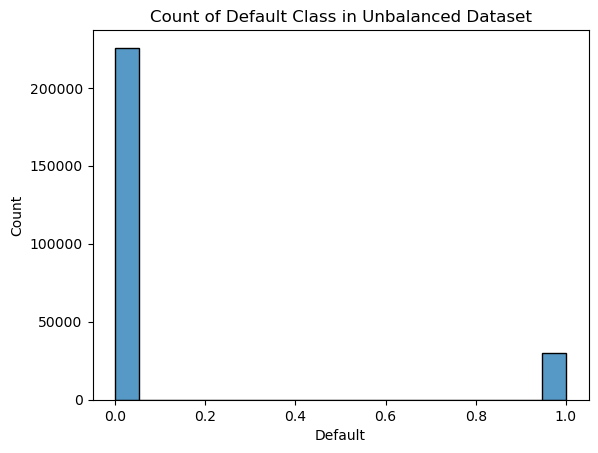

In [10]:
# Look at dependent variable classes 
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(LoanData['Default'])
plt.title('Count of Default Class in Unbalanced Dataset')

## Numerical Variable Analysis

In [11]:
# Extract numerical variables 
num_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
LoanData_num = LoanData[num_features]
LoanData_num

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
0,56,85994.0,50587.0,520,80,4,0.1523,36,0.44
1,69,50432.0,124440.0,458,15,1,0.0481,60,0.68
2,46,84208.0,129188.0,451,26,3,0.2117,24,0.31
3,32,31713.0,44799.0,743,0,3,0.0707,24,0.23
4,60,20437.0,9139.0,633,8,4,0.0651,48,0.73
...,...,...,...,...,...,...,...,...,...
255342,19,37979.0,210682.0,541,109,4,0.1411,12,0.85
255343,32,51953.0,189899.0,511,14,2,0.1155,24,0.21
255344,56,84820.0,208294.0,597,70,3,0.0529,60,0.50
255345,42,85109.0,60575.0,809,40,1,0.2090,48,0.44


In [12]:
# General statistics 

LoanData_num.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,0.134928,36.025894,0.500212
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,0.066364,16.969330,0.230917
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,0.020000,12.000000,0.100000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,0.077700,24.000000,0.300000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,0.134600,36.000000,0.500000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,0.192500,48.000000,0.700000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,0.250000,60.000000,0.900000


In [13]:
# Interpret 

# Age : Mean = 43, Range: 18 to 69
# Income: Mean = 82.5K, Range: 15K to 150K
# LoanAmount: Mean = 127K, Range: 5K to 250K
# CreditScore: Mean = 574, Range: 300 to 850 --> range of Equifax Credit Score system
# MonthsEmployed: Mean = 60, Range: 0 to 120
# NumCreditLines: Mean = 2.5, Range: 1 to 4
# InterestRate: Mean = 13.5%, Range: 2% to 25%
# LoanTerm: Mean = 36 months, Range: 12 months to 60 months
#DTIRatio: Mean = 0.5, Range: 0.1 to 0.9

In [14]:
# Outlier detection (done early to make sure structure does not change later )

# create function to calculate outliers 

# list of num variables already extracted in
# --> Num_features

def outlier_detection(df, columns):
    
    #iqr 
    iqr_values = {}
    
    # boundaries 
    boundaries = {}
    
    for col in columns: 
        
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        iqr_values[col] = iqr
        
        lower_bound = q1 - 1.5*iqr_values[col]
        upper_bound = q3 + 1.5*iqr_values[col]
        boundaries[col] = [lower_bound, upper_bound]
        
    return boundaries

In [15]:
outlier_detection(LoanData_num, num_features)

{'Age': [-6.5, 93.5],
 'Income': [-52264.75, 217309.25],
 'LoanAmount': [-118087.5, 373228.5],
 'CreditScore': [24.5, 1124.5],
 'MonthsEmployed': [-60.0, 180.0],
 'NumCreditLines': [0.5, 4.5],
 'InterestRate': [-0.09450000000000003, 0.3647],
 'LoanTerm': [-12.0, 84.0],
 'DTIRatio': [-0.3, 1.2999999999999998]}

In [16]:
# Reformat attributes from months to years 

# MonthsEmployed in Years
LoanData['YearsEmployed'] = LoanData['MonthsEmployed'] / 12
LoanData['YearsEmployed'] = round(LoanData['YearsEmployed'], 1)
LoanData['YearsEmployed'].head()

# LoanTerm in Years 
LoanData['LoanTerm_In_Years'] = LoanData['LoanTerm'] / 12
LoanData.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,YearsEmployed,LoanTerm_In_Years
0,56,85994.0,50587.0,520,80,4,0.1523,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,6.7,3.0
1,69,50432.0,124440.0,458,15,1,0.0481,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,1.2,5.0
2,46,84208.0,129188.0,451,26,3,0.2117,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,2.2,2.0
3,32,31713.0,44799.0,743,0,3,0.0707,24,0.23,High School,Full-time,Married,No,No,Business,No,0,0.0,2.0
4,60,20437.0,9139.0,633,8,4,0.0651,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,0.7,4.0


In [17]:
# DTI Ratio --> Standard: Good if DTI < 36% (0.36)
## Create attribute that classifies loan applicant DTI ratio based on th standard 


LoanData['DTI_Classification'] = np.where((LoanData['DTIRatio'] <= 0.36), 'Good', 'Bad')
                                                             

In [18]:
# Classify loan Credit Score 
CreditScoreMin = LoanData['CreditScore'].min()
CreditScoreMax = LoanData['CreditScore'].max()
print('Minimum Credit Score:', CreditScoreMin)
print('Maximum CreditScore:', CreditScoreMax)

Minimum Credit Score: 300
Maximum CreditScore: 849


In [19]:
#Interpret: Credit Score ranges from 300 to 850 --> range of Equifax system 

# -> Making assumption that the credit score system is the one being used 

# so: Categorize Credit score based on equifax thresholds

In [20]:
conditions = [
    (LoanData['CreditScore'] >=300) & (LoanData['CreditScore'] < 580),
    (LoanData['CreditScore'] >= 580) & (LoanData['CreditScore'] < 670),
    (LoanData['CreditScore'] >= 670) & (LoanData['CreditScore'] < 740),
    (LoanData['CreditScore'] >= 740) & (LoanData['CreditScore'] < 800),
    (LoanData['CreditScore'] >= 800)
    
    
]

In [21]:
values = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

In [22]:
LoanData['CreditScoreRating'] = np.select(conditions, values)

In [23]:
# Check 
LoanData['CreditScore'].groupby(LoanData['CreditScoreRating']).describe()

,count,mean,std,min,25%,50%,75%,max
CreditScoreRating,,,,,,,,
Excellent,23468.0,824.493480,14.375318,800.0,812.0,825.0,837.0,849.0
Fair,41847.0,624.494611,25.929987,580.0,602.0,625.0,647.0,669.0
Good,32073.0,704.400181,20.322804,670.0,687.0,704.0,722.0,739.0
Poor,130223.0,439.403777,80.779124,300.0,369.0,440.0,509.0,579.0
Very Good,27736.0,769.452481,17.332294,740.0,754.0,769.0,785.0,799.0


In [24]:
# check data types 
LoanData.dtypes

Age                     int64
Income                float64
LoanAmount            float64
CreditScore             int64
MonthsEmployed          int64
NumCreditLines          int64
InterestRate          float64
LoanTerm                int64
DTIRatio              float64
Education              object
EmploymentType         object
MaritalStatus          object
HasMortgage            object
HasDependents          object
LoanPurpose            object
HasCoSigner            object
Default                 int64
YearsEmployed         float64
LoanTerm_In_Years     float64
DTI_Classification     object
CreditScoreRating      object
dtype: object

Text(0.5, 1.0, 'Frequency of Age Values')

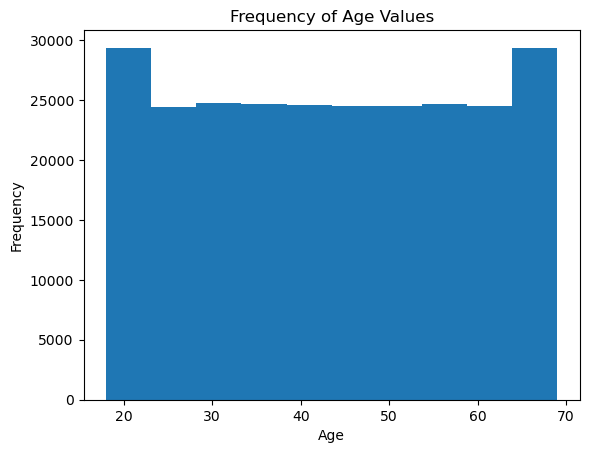

In [25]:
# Visual analysis of numerical attributes 

import matplotlib.pyplot as plt 

# Age distribution 

plt.hist(LoanData['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Age Values')

In [26]:
# Interpret: Age distribution is uniform apart from at the tails 
# What if we categorize to Age Groups? 

#Age Range 

MinAge = LoanData['Age'].min()
MaxAge = LoanData['Age'].max()

print('Minimum Age:', MinAge)
print('Maximum Age:', MaxAge)

Minimum Age: 18
Maximum Age: 69


In [27]:


conditions = [
    (LoanData['Age'] >=18) & (LoanData['Age'] < 30),
    (LoanData['Age'] >= 30) & (LoanData['Age'] < 40),
    (LoanData['Age'] >= 40) & (LoanData['Age'] < 50),
    (LoanData['Age'] >= 50) & (LoanData['Age'] < 60),
    (LoanData['Age'] >= 60)
    
    
]

values = ['18-30', '30-40', '40-50', '50-60', '60+']


LoanData['AgeGroup'] = np.select(conditions, values)

In [28]:
# Verify

LoanData['Age'].groupby(LoanData['AgeGroup']).describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
18-30,58623.0,23.496716,3.456740,18.0,20.0,24.0,27.0,29.0
30-40,49491.0,34.495565,2.871512,30.0,32.0,34.0,37.0,39.0
40-50,49110.0,44.495052,2.875452,40.0,42.0,45.0,47.0,49.0
50-60,49149.0,54.500519,2.865850,50.0,52.0,55.0,57.0,59.0
60+,48974.0,64.497407,2.864921,60.0,62.0,65.0,67.0,69.0


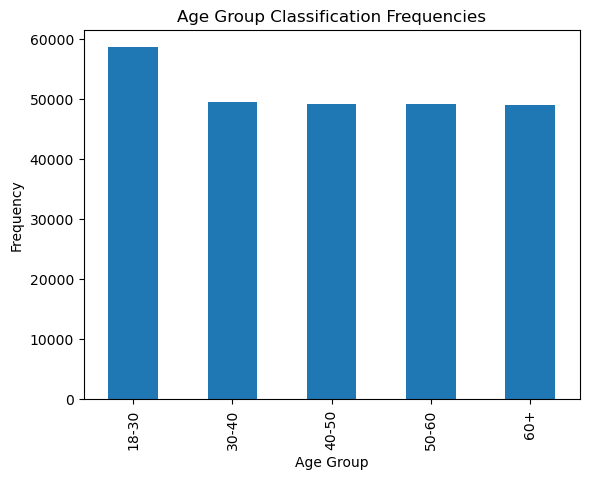

In [29]:
# reproduce Age distribution but using groups 

# Define the correct order of categories
age_order = ['18-30', '30-40', '40-50', '50-60', '60+']

# Convert AgeGroup to a categorical type with an explicit order
LoanData['AgeGroup'] = pd.Categorical(LoanData['AgeGroup'], categories=age_order, ordered=True)

# Get value counts, ensuring they are ordered according to the specified categories
age_group_counts = LoanData['AgeGroup'].value_counts(sort=False)

# Plot the histogram as a bar chart
age_group_counts.plot(kind='bar')

# Add title and labels
plt.title('Age Group Classification Frequencies')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [30]:
# get values of Age distribution

LoanData['AgeGroup'].value_counts() # slightly more 18-30, could be young prof / students?

18-30    58623
30-40    49491
50-60    49149
40-50    49110
60+      48974
Name: AgeGroup, dtype: int64

(array([25613., 25411., 25466., 25532., 25727., 25480., 25466., 25646.,
        25439., 25567.]),
 array([ 15000. ,  28499.9,  41999.8,  55499.7,  68999.6,  82499.5,
         95999.4, 109499.3, 122999.2, 136499.1, 149999. ]),
 <BarContainer object of 10 artists>)

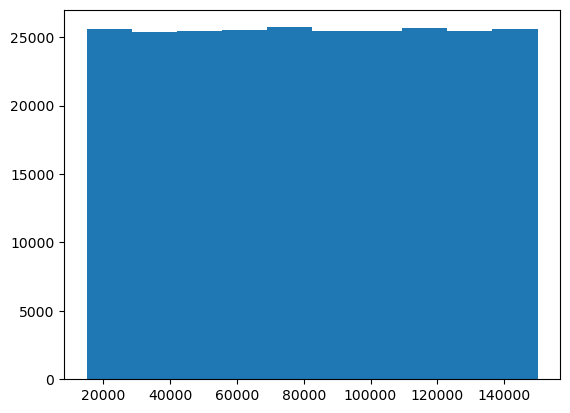

In [31]:
# Income 

plt.hist(LoanData['Income']) # Income also uniformally distributed 

In [32]:
# Group Income to make histogram more interpretable 

## Look at range of values to see how to split income 
IncomeMin = LoanData['Income'].min()
IncomeMax = LoanData['Income'].max()
print('Income Minimum:', IncomeMin)
print('Income Maximum:', IncomeMax)


Income Minimum: 15000.0
Income Maximum: 149999.0


In [33]:
conditions = [
    (LoanData['Income'] >=15000) & (LoanData['Income'] < 30000),
    (LoanData['Income'] >= 30000) & (LoanData['Income'] < 60000),
    (LoanData['Income'] >= 60000) & (LoanData['Income'] < 90000),
    (LoanData['Income'] >= 90000) & (LoanData['Income'] < 150000)
    
    
    
]

values = ['Low', 'Lower-Middle', 'Middle', 'Upper']


LoanData['IncomeGroup'] = np.select(conditions, values)

In [34]:
#Check
LoanData['Income'].groupby(LoanData['IncomeGroup']).describe()

,count,mean,std,min,25%,50%,75%,max
IncomeGroup,,,,,,,,
Low,28402.0,22479.219914,4322.607149,15000.0,18729.00,22516.5,26176.75,29999.0
Lower-Middle,56651.0,45026.165734,8664.070859,30000.0,37545.50,45023.0,52523.00,59999.0
Middle,56874.0,75002.776471,8647.088755,60000.0,67568.00,75018.0,82484.00,89999.0
Upper,113420.0,120005.377385,17313.327185,90000.0,105047.75,119959.5,134979.25,149999.0


Text(0.5, 1.0, 'Frequency of Income Groups')

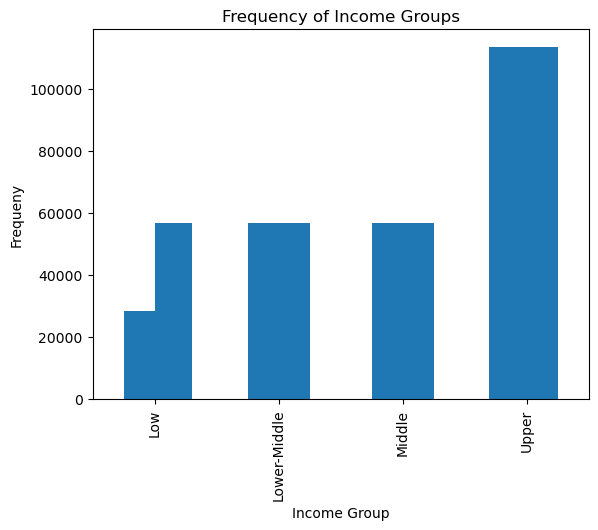

In [35]:
# Define the correct order of categories
Income_order = ['Low', 'Lower-Middle', 'Middle', 'Upper']

# Convert AgeGroup to a categorical type with an explicit order
LoanData['IncomeGroup'] = pd.Categorical(LoanData['IncomeGroup'], categories=Income_order, ordered=True)


# Get value counts, ensuring they are ordered according to the specified categories
Income_group_counts = LoanData['IncomeGroup'].value_counts(sort=False)

# Plot the histogram as a bar chart
Income_group_counts.plot(kind='bar')#Plot the Income Categories 

plt.hist(LoanData['IncomeGroup'])
plt.xlabel('Income Group')
plt.ylabel('Frequeny')
plt.title('Frequency of Income Groups')


# Note: Try and split by Default Class

In [36]:
# Amount of defaults by Income Groups 

pd.crosstab(LoanData['IncomeGroup'], LoanData['Default'], normalize = 'columns')

Default,0,1
IncomeGroup,,
Low,0.098213,0.210299
Lower-Middle,0.218920,0.244225
Middle,0.226391,0.194888
Upper,0.456476,0.350588


In [37]:
# Get Default Rates for the different income groups 

LowIncomeDefault = 6236 / (6236+22166)
LowMidIncomeDefault = 7249 / (7242+49409)
MidIncomeDefault = 5779 / (5779+51095)
UpperIncomeDefault = 10396 / (10396+103024)

print('Low Income Default Rate:', round(LowIncomeDefault, 3))
print('Low-Medium Income Default Rate', round(LowMidIncomeDefault, 3))
print('Mid Income Default Rate:', round(MidIncomeDefault, 3))
print('Upper Income Default Rate:', round(UpperIncomeDefault, 3))

Low Income Default Rate: 0.22
Low-Medium Income Default Rate 0.128
Mid Income Default Rate: 0.102
Upper Income Default Rate: 0.092


(array([25689., 25508., 25430., 25514., 25481., 25388., 25436., 25491.,
        25784., 25626.]),
 array([  5000. ,  29499.9,  53999.8,  78499.7, 102999.6, 127499.5,
        151999.4, 176499.3, 200999.2, 225499.1, 249999. ]),
 <BarContainer object of 10 artists>)

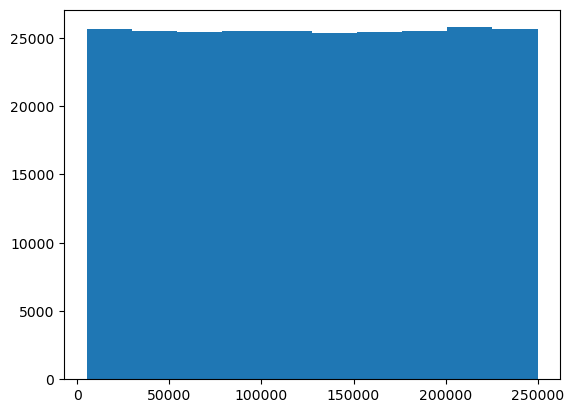

In [38]:
# Loan Amount analysis

plt.hist(LoanData['LoanAmount']) # similar to Income

Text(0.5, 1.0, 'Frequency of Credit Groups')

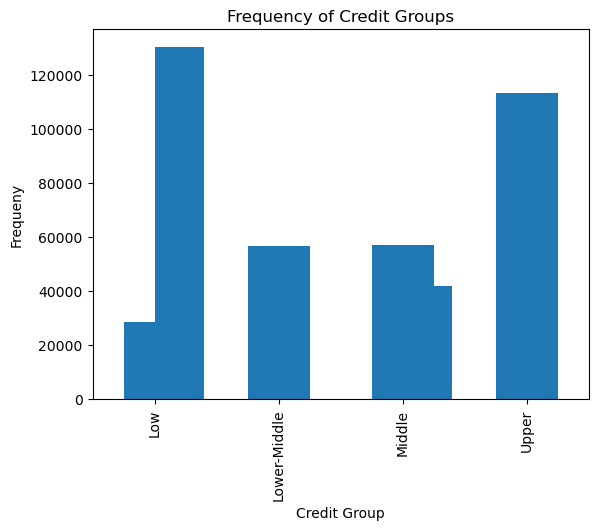

In [39]:
# Define the correct order of categories
Credit_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Convert AgeGroup to a categorical type with an explicit order
LoanData['CreditScoreRating'] = pd.Categorical(LoanData['CreditScoreRating'], categories=Credit_order, ordered=True)


# Get value counts, ensuring they are ordered according to the specified categories
Credit_group_counts = LoanData['CreditScoreRating'].value_counts(sort=False)

# Plot the histogram as a bar chart
Income_group_counts.plot(kind='bar')#Plot the Income Categories 

plt.hist(LoanData['CreditScoreRating'])
plt.xlabel('Credit Group')
plt.ylabel('Frequeny')
plt.title('Frequency of Credit Groups')


# Note: Try and split by Default Class

In [40]:
# analyse the income of the different credit score classes 

crosstab1 = pd.crosstab(LoanData['IncomeGroup'], LoanData['CreditScoreRating'], normalize = 'columns')
crosstab1

CreditScoreRating,Poor,Fair,Good,Very Good,Excellent
IncomeGroup,,,,,
Low,0.111570,0.108467,0.112182,0.110542,0.113772
Lower-Middle,0.221336,0.223863,0.221775,0.223176,0.219746
Middle,0.221558,0.226205,0.224862,0.223284,0.219490
Upper,0.445536,0.441465,0.441181,0.442998,0.446992


<Axes: xlabel='IncomeGroup'>

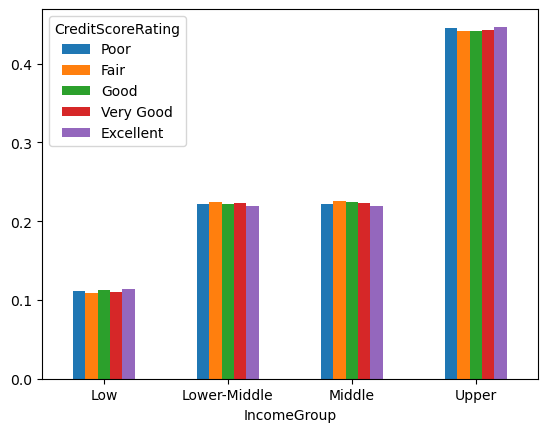

In [41]:
# bar plot of crosstab1 

barplot1 =crosstab1.plot.bar(rot=0)
barplot1

In [42]:
# Average Credit Score rating by Income Group

LoanData['CreditScore'].groupby(LoanData['IncomeGroup']).mean()

IncomeGroup
Low             574.614675
Lower-Middle    574.255424
Middle          574.444280
Upper           574.090848
Name: CreditScore, dtype: float64

In [43]:
# Median Credit Score rating by Income Group 

LoanData['CreditScore'].groupby(LoanData['IncomeGroup']).median()

IncomeGroup
Low             573.0
Lower-Middle    575.0
Middle          575.0
Upper           573.0
Name: CreditScore, dtype: float64

In [44]:
# Interpret: On average, the different income groups have the same avg and median credit score ratings 

Text(0.5, 1.0, 'Default Across Income Groups')

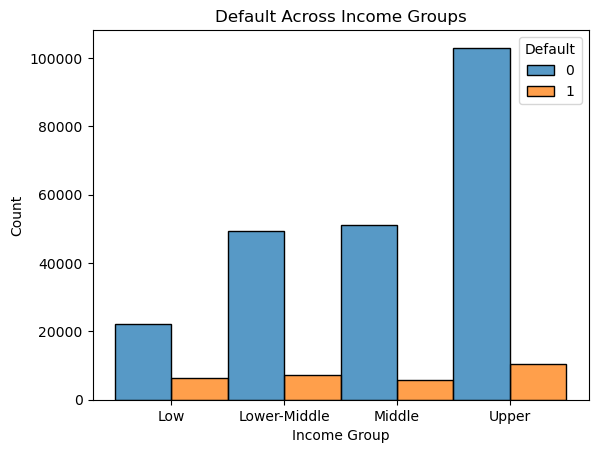

In [45]:
group = LoanData['Default']

sns.histplot(data = LoanData,x = 'IncomeGroup', hue = group, multiple = 'dodge')
plt.xlabel('Income Group')
plt.title('Default Across Income Groups')




In [46]:
# Interpret: more or les same amount of defaults in each income group 

Text(0.5, 1.0, 'Credit Score Group Across Default Groups')

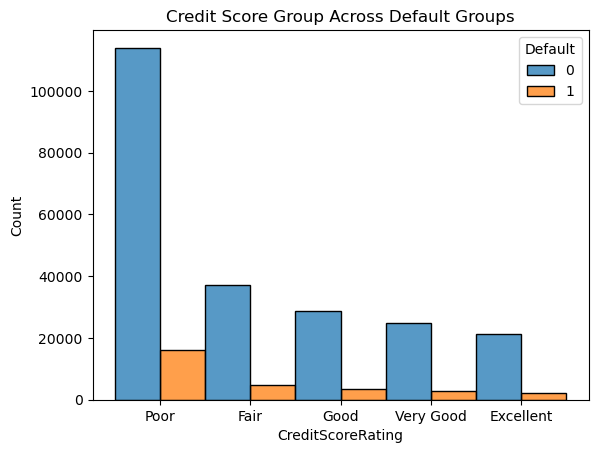

In [47]:
# Amount of defaults across credit score groupinngs 

sns.histplot(x = LoanData['CreditScoreRating'], hue = group, multiple ='dodge')
plt.title('Credit Score Group Across Default Groups')

In [48]:
# Interpret: There appears to be more defaults (absolute quantity) in low credits score group

pd.crosstab(LoanData['CreditScoreRating'], LoanData['Default'], normalize = 'columns')

Default,0,1
CreditScoreRating,,
Poor,0.505011,0.547837
Fair,0.164218,0.161333
Good,0.127004,0.114963
Very Good,0.109990,0.098203
Excellent,0.093777,0.077665


In [49]:
# Interpret: The Default and No Default group have similar distributions of credit score rating



<Axes: xlabel='YearsEmployed', ylabel='Count'>

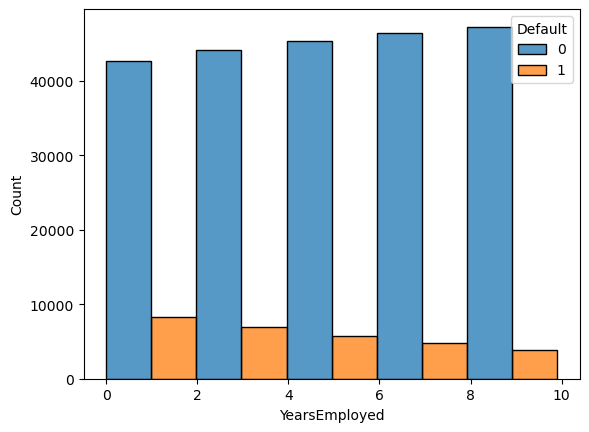

In [50]:
# Years Employed

# general distribution --> uniform

sns.histplot(LoanData, x= 'YearsEmployed', bins = 5, hue = 'Default', multiple = 'dodge') # years employed uniformally distributed

In [51]:
# statistics of years employed by default group 

LoanData['YearsEmployed'].groupby(LoanData['Default']).describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,5.063778,2.879870,0.0,2.6,5.1,7.6,9.9
1,29653.0,4.185877,2.823959,0.0,1.8,3.8,6.5,9.9


In [52]:
# Interpret: Range the same. Slight different in Mean 

In [53]:
# Median years employed by default group

LoanData['YearsEmployed'].groupby(LoanData['Default']).median() # more significance between groups medians

Default
0    5.1
1    3.8
Name: YearsEmployed, dtype: float64

<Axes: xlabel='NumCreditLines', ylabel='Count'>

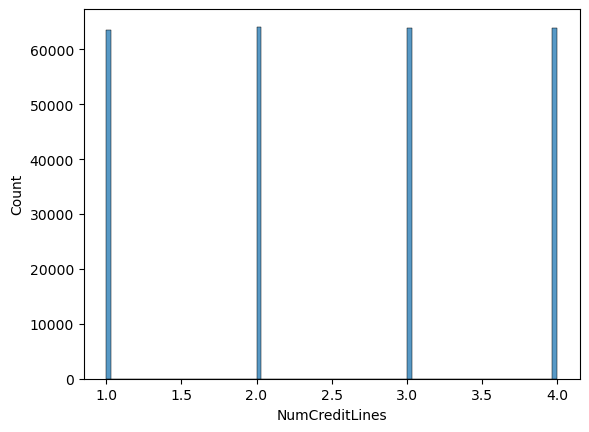

In [54]:
# Num Credit Lines 

sns.histplot(LoanData['NumCreditLines']) # evenly distributed 

In [55]:
# is there a difference in the number of credit lines for the different default groups? 

LoanData['NumCreditLines'].groupby(LoanData['Default']).describe() 

# more or less the same, although median is higher for the default group

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,2.489566,1.116350,1.0,1.0,2.0,3.0,4.0
1,29653.0,2.588338,1.118258,1.0,2.0,3.0,4.0,4.0


<Axes: xlabel='LoanTerm_In_Years', ylabel='Count'>

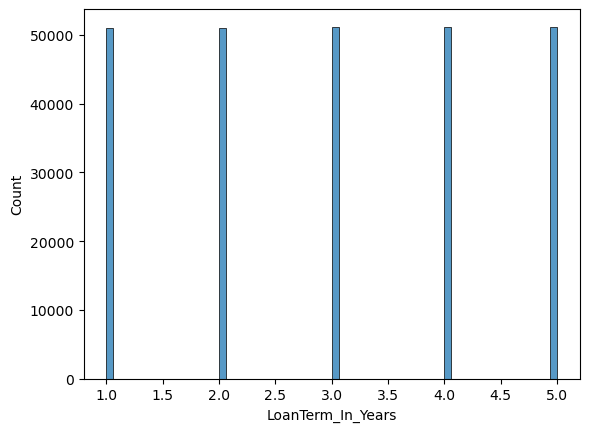

In [56]:
# LoanTerm

sns.histplot(LoanData['LoanTerm_In_Years']) # Equally distributed across all term lengths

# Interpret: These are mainly short term loans 

In [57]:
# Do loan terms differ across default groups? 

pd.crosstab(LoanData['LoanTerm_In_Years'], LoanData['Default'], normalize = 'columns') # same distribution

Default,0,1
LoanTerm_In_Years,,
1.0,0.199549,0.199643
2.0,0.199775,0.199676
3.0,0.200067,0.199204
4.0,0.200466,0.199710
5.0,0.200143,0.201767


In [58]:
# Do loan terms differ across income groups (do you get diff loan terms/conditions based on income group?)

pd.crosstab(LoanData['LoanTerm_In_Years'], LoanData['IncomeGroup'], normalize = 'columns')

# Interpret: same distribution across income groups 

IncomeGroup,Low,Lower-Middle,Middle,Upper
LoanTerm_In_Years,,,,
1.0,0.200549,0.201320,0.199124,0.198651
2.0,0.194705,0.198531,0.202500,0.200273
3.0,0.203119,0.198037,0.198614,0.200820
4.0,0.198190,0.201320,0.198913,0.201190
5.0,0.203436,0.200791,0.200847,0.199065


In [59]:
# Do Loan term differ across income groups? (do you get diff loan terms/conditions based on credit score?)

pd.crosstab(LoanData['LoanTerm_In_Years'], LoanData['CreditScoreRating'],  normalize = 'columns')

# Interpret: more or loss the same across all credit score groups

CreditScoreRating,Poor,Fair,Good,Very Good,Excellent
LoanTerm_In_Years,,,,,
1.0,0.201086,0.195856,0.199202,0.199596,0.198142
2.0,0.199051,0.200229,0.201447,0.198875,0.201636
3.0,0.199796,0.197649,0.201416,0.200317,0.202659
4.0,0.201416,0.199990,0.196458,0.198659,0.202702
5.0,0.198652,0.206275,0.201478,0.202553,0.194861


Text(0.5, 0, 'DTI Class')

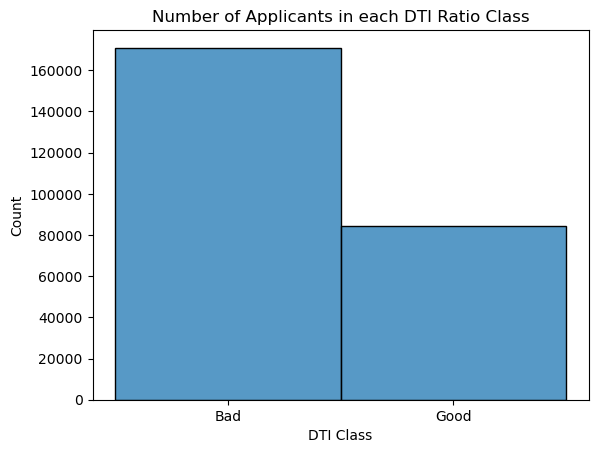

In [60]:
# DTI Ratio

# --> Look at the DTI Ratio gorups 

sns.histplot(LoanData['DTI_Classification']) 
plt.title('Number of Applicants in each DTI Ratio Class')
plt.xlabel('DTI Class')

# there are significantly more bad DTI ratios than good 

Text(0.5, 0, 'DTI Class')

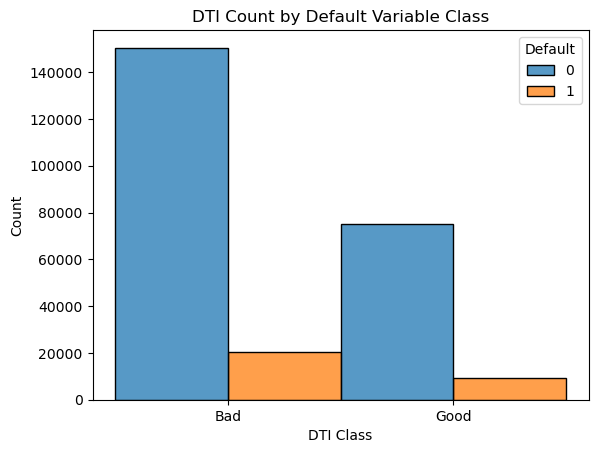

In [61]:
# Does it differ among Default groupings? 

sns.histplot(x = LoanData['DTI_Classification'], hue = group, multiple = 'dodge')
plt.title('DTI Count by Default Variable Class')
plt.xlabel('DTI Class')

In [62]:
# what is the proportion across default groups? 

pd.crosstab(LoanData['DTI_Classification'], LoanData['Default'], normalize = 'columns')

# proportions the same across default groups 

Default,0,1
DTI_Classification,,
Bad,0.666695,0.691532
Good,0.333305,0.308468


In [63]:
# what is the proportion across income groups? 

pd.crosstab(LoanData['DTI_Classification'], LoanData['IncomeGroup'], normalize = 'columns')

# proportions the same across income groups 

IncomeGroup,Low,Lower-Middle,Middle,Upper
DTI_Classification,,,,
Bad,0.673438,0.668055,0.671238,0.668542
Good,0.326562,0.331945,0.328762,0.331458


In [64]:
# what is the proportion across credit score groups? 

pd.crosstab(LoanData['DTI_Classification'], LoanData['CreditScoreRating'], normalize = 'columns')

# same across credit score groups 

CreditScoreRating,Poor,Fair,Good,Very Good,Excellent
DTI_Classification,,,,,
Bad,0.670826,0.665998,0.668849,0.671726,0.667505
Good,0.329174,0.334002,0.331151,0.328274,0.332495


In [65]:
# DTI Ratio across age groups 

pd.crosstab(LoanData['DTI_Classification'], LoanData['AgeGroup'], normalize = 'columns')

# same across age groups

AgeGroup,18-30,30-40,40-50,50-60,60+
DTI_Classification,,,,,
Bad,0.67146,0.673072,0.670067,0.667623,0.665271
Good,0.32854,0.326928,0.329933,0.332377,0.334729


## Categorical Variable Analysis

<Axes: xlabel='Education', ylabel='Count'>

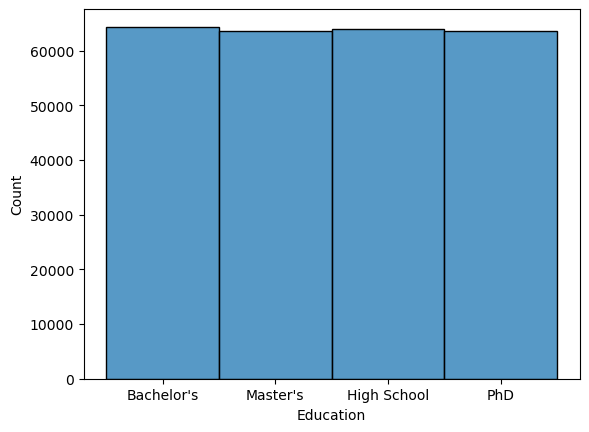

In [66]:
# Education levels of loan applicants 

sns.histplot(data = LoanData, x = 'Education')

Text(0.5, 1.0, 'Education Level across Default Group')

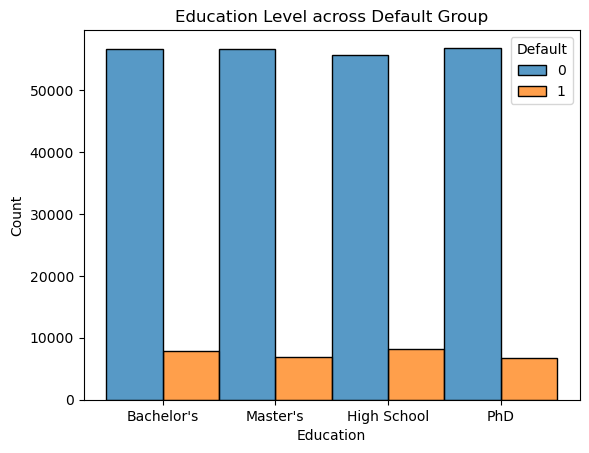

In [67]:
# Education level filtered by default group 

sns.histplot(data = LoanData, x = 'Education', hue = group, multiple = 'dodge')
plt.title('Education Level across Default Group')

# interpret: Same amount of education across group

In [68]:
# crosstab education / default

pd.crosstab(LoanData['Education'], LoanData['Default'], normalize = 'columns')

# Interpret: Minor differences between the two default groups 
# --> maybe as education increases default decreases? 

Default,0,1
Education,,
Bachelor's,0.250680,0.262672
High School,0.246675,0.277544
Master's,0.250928,0.232961
PhD,0.251717,0.226824


In [69]:
# How does income group differ across education levels? 

pd.crosstab(LoanData['IncomeGroup'], LoanData['Education'], normalize = 'columns')

# Interpret: similar income distributions across education levels

Education,Bachelor's,High School,Master's,PhD
IncomeGroup,,,,
Low,0.110462,0.112671,0.108906,0.112879
Lower-Middle,0.220240,0.221414,0.221133,0.224672
Middle,0.225259,0.224841,0.221479,0.219305
Upper,0.444039,0.441075,0.448482,0.443143


In [70]:
# How does education level differ across age groups?

pd.crosstab(LoanData['AgeGroup'], LoanData['Education'], normalize = 'columns')

# Education is split the same way across Age groups

Education,Bachelor's,High School,Master's,PhD
AgeGroup,,,,
18-30,0.229935,0.229535,0.228215,0.230637
30-40,0.194295,0.192370,0.195008,0.193604
40-50,0.190458,0.193543,0.192427,0.192895
50-60,0.193363,0.192651,0.192710,0.191180
60+,0.191949,0.191900,0.191640,0.191684


In [71]:
# Are the 'less educated' more or less likely to have dependents? 

pd.crosstab(LoanData['HasDependents'], LoanData['Education'], normalize = 'columns')

# nothing stands out --> minimal differences in probability of having kids 

Education,Bachelor's,High School,Master's,PhD
HasDependents,,,,
No,0.50101,0.498803,0.500071,0.499032
Yes,0.49899,0.501197,0.499929,0.500968


In [72]:
# What are the loan purposes of the different education levels? 

pd.crosstab(LoanData['LoanPurpose'], LoanData['Education'], normalize = 'columns')

# more or less the same across education groups

Education,Bachelor's,High School,Master's,PhD
LoanPurpose,,,,
Auto,0.195321,0.199490,0.201870,0.199836
Business,0.201551,0.200319,0.201649,0.200057
Education,0.202063,0.199099,0.197652,0.200151
Home,0.200463,0.201149,0.200752,0.201032
Other,0.200603,0.199944,0.198077,0.198923


In [73]:
# Employment Type 

# Are there differences in employment type across the income groups?
pd.crosstab(LoanData['EmploymentType'], LoanData['IncomeGroup'], normalize = 'columns')

# more or less the same

IncomeGroup,Low,Lower-Middle,Middle,Upper
EmploymentType,,,,
Full-time,0.243434,0.247180,0.249657,0.251631
Part-time,0.252517,0.251540,0.252066,0.250423
Self-employed,0.249982,0.249404,0.250642,0.248827
Unemployed,0.254067,0.251876,0.247635,0.249118


In [74]:
# Are the differences in employment type across age groups? 

pd.crosstab(LoanData['AgeGroup'], LoanData['EmploymentType'], normalize = 'columns')

EmploymentType,Full-time,Part-time,Self-employed,Unemployed
AgeGroup,,,,
18-30,0.228792,0.230561,0.231579,0.227391
30-40,0.194781,0.194994,0.190861,0.194629
40-50,0.190634,0.192718,0.192666,0.193282
50-60,0.193226,0.190677,0.193451,0.192576
60+,0.192566,0.191051,0.191442,0.192122


In [75]:
# Does Employment type have an effect on DTI_classification? 

pd.crosstab(LoanData['EmploymentType'], LoanData['DTI_Classification'], normalize = 'columns')

# not substantial differences 

DTI_Classification,Bad,Good
EmploymentType,,
Full-time,0.249446,0.248981
Part-time,0.251259,0.251292
Self-employed,0.249212,0.250047
Unemployed,0.250083,0.249680


In [76]:
# Does Employment type make a difference on whether individuals have mortgages? 

pd.crosstab(LoanData['EmploymentType'], LoanData['HasMortgage'], normalize = 'columns')

# no substantial differences

HasMortgage,No,Yes
EmploymentType,,
Full-time,0.250121,0.248463
Part-time,0.251234,0.251306
Self-employed,0.248406,0.250570
Unemployed,0.250239,0.249661


<Axes: xlabel='MaritalStatus', ylabel='Count'>

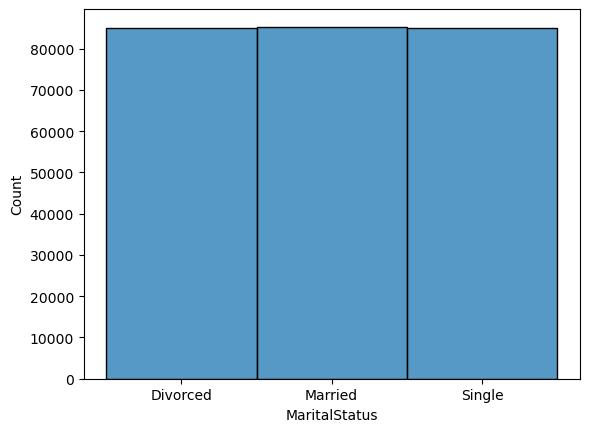

In [77]:
# Marital Status 

## distribution 

sns.histplot(LoanData['MaritalStatus'])

# same proportion across marital status 

In [78]:
# Do income levels differ dependent on marital status? 

pd.crosstab(LoanData['MaritalStatus'], LoanData['IncomeGroup'], normalize = 'columns')

# same frequencies for all income levels across relationship status

IncomeGroup,Low,Lower-Middle,Middle,Upper
MaritalStatus,,,,
Divorced,0.334307,0.332104,0.333245,0.333019
Married,0.332899,0.335334,0.334582,0.333460
Single,0.332793,0.332563,0.332173,0.333521


In [79]:
# Do the married individuals have more chance of haivng dependents? 

pd.crosstab(LoanData['MaritalStatus'], LoanData['HasDependents'], normalize = 'columns')

# same probabilities across

HasDependents,No,Yes
MaritalStatus,,
Divorced,0.333083,0.332937
Married,0.333561,0.334565
Single,0.333357,0.332498


<Axes: xlabel='MaritalStatus', ylabel='Count'>

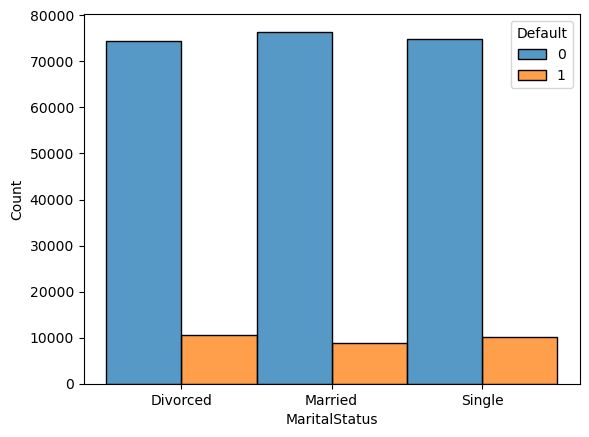

In [80]:
# Are married individuals more likely to default? 

sns.histplot(LoanData, x= 'MaritalStatus', hue = group, multiple = 'dodge')

# uniformally distributed across 'Default' classs

In [81]:
# calculate the probabilities of default for different Relationship statuses 

pd.crosstab(LoanData['MaritalStatus'], LoanData['Default'], normalize = 'columns')

Default,0,1
MaritalStatus,,
Divorced,0.329544,0.359390
Married,0.338658,0.299093
Single,0.331799,0.341517


In [82]:
# Look defaults among marital statuses

pd.crosstab(LoanData['MaritalStatus'], LoanData['Default'], normalize = 'columns')

# More divorces if default --> could be that divorces cause defaults as loans were taken jointly when married?

Default,0,1
MaritalStatus,,
Divorced,0.329544,0.359390
Married,0.338658,0.299093
Single,0.331799,0.341517


In [83]:
# Look at age groups of different marital statuses 

pd.crosstab(LoanData['MaritalStatus'], LoanData['AgeGroup'], normalize = 'columns')

# distribution is the same for all age groups

AgeGroup,18-30,30-40,40-50,50-60,60+
MaritalStatus,,,,,
Divorced,0.332276,0.332970,0.335594,0.331828,0.332523
Married,0.330996,0.336566,0.332845,0.334269,0.336219
Single,0.336728,0.330464,0.331562,0.333903,0.331257


In [84]:
# Do DTI ratios differ among relationoships statuses? (Again, does divorce affect loans?)

pd.crosstab(LoanData['MaritalStatus'], LoanData['DTI_Classification'], normalize = 'columns')

# no difference among diff marital statuses 

DTI_Classification,Bad,Good
MaritalStatus,,
Divorced,0.332043,0.334969
Married,0.333715,0.334767
Single,0.334242,0.330264


In [85]:
# Are there significant differences in CreditScore ratings among relat. statuses?

pd.crosstab(LoanData['MaritalStatus'], LoanData['CreditScoreRating'], normalize = 'columns')

# no real differences

CreditScoreRating,Poor,Fair,Good,Very Good,Excellent
MaritalStatus,,,,,
Divorced,0.331785,0.335317,0.334674,0.335557,0.330407
Married,0.334265,0.329271,0.336233,0.335016,0.337396
Single,0.333950,0.335412,0.329093,0.329427,0.332197


<Axes: xlabel='HasMortgage', ylabel='Count'>

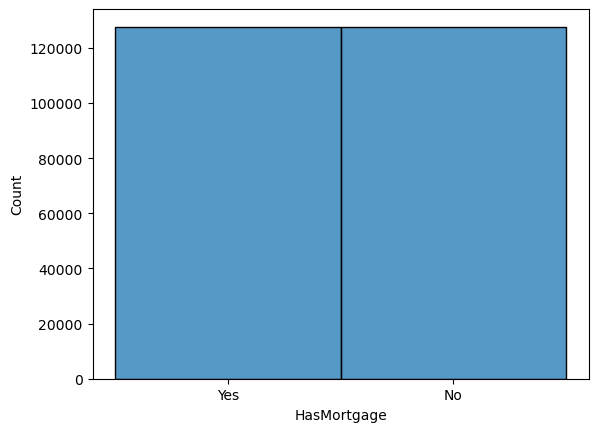

In [86]:
# HasMortgage 

# Count 

sns.histplot(LoanData['HasMortgage'])
# same frequency

<Axes: xlabel='HasMortgage', ylabel='Count'>

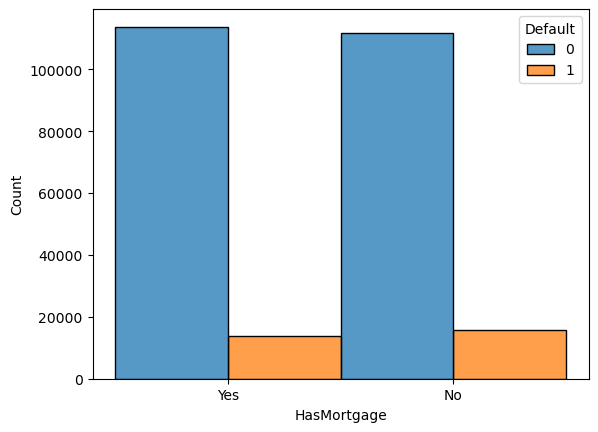

In [87]:
# What if we filter by Default? 

sns.histplot(LoanData, x = 'HasMortgage', hue = group, multiple = 'dodge')

#Same proportion across Default filter

In [88]:
# What if we filter by Income grouping? 

pd.crosstab(LoanData['HasMortgage'], LoanData['IncomeGroup'], normalize = 'columns')

# same distribution for different income groups

IncomeGroup,Low,Lower-Middle,Middle,Upper
HasMortgage,,,,
No,0.502781,0.49932,0.4984,0.500414
Yes,0.497219,0.50068,0.5016,0.499586


In [89]:
# Looking at HasMortgage across age groups: 

pd.crosstab(LoanData['HasMortgage'], LoanData['AgeGroup'], normalize = 'columns')

# same distribution across the different age groups 

AgeGroup,18-30,30-40,40-50,50-60,60+
HasMortgage,,,,,
No,0.499531,0.50199,0.499857,0.498769,0.499857
Yes,0.500469,0.49801,0.500143,0.501231,0.500143


In [90]:
# Maybe there is a relationship between having a mortgage and credit score? 

pd.crosstab(LoanData['HasMortgage'], LoanData['CreditScoreRating'], normalize = 'columns')

# unlikely as there appears to be no substantial differences between the groups

CreditScoreRating,Poor,Fair,Good,Very Good,Excellent
HasMortgage,,,,,
No,0.499988,0.501971,0.501512,0.499748,0.494631
Yes,0.500012,0.498029,0.498488,0.500252,0.505369


<Axes: xlabel='HasDependents', ylabel='Count'>

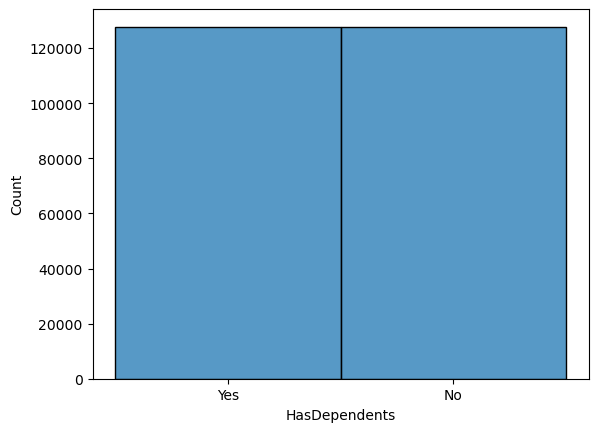

In [91]:
# HasDependents 

# General distribution 

sns.histplot(LoanData, x = 'HasDependents')

# Interpret: Uniform distributionabs

<Axes: xlabel='HasDependents', ylabel='Count'>

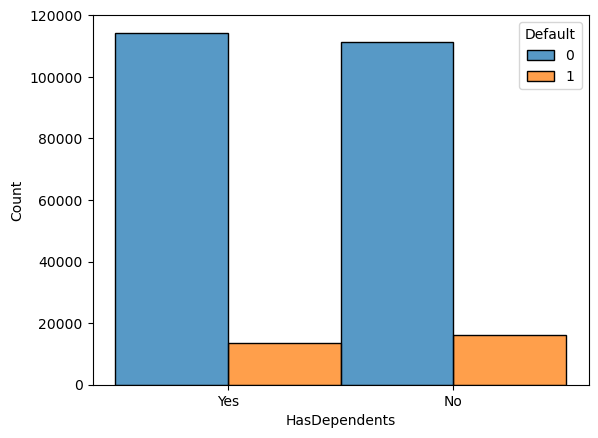

In [92]:
# Is there a difference in proportion of 'has dependents' among Default class?

sns.histplot(LoanData, x = 'HasDependents', hue = group, multiple = 'dodge')

# same distribution across

In [93]:
# Proba of having dependents among default status 

pd.crosstab(LoanData['HasDependents'], LoanData['Default'], normalize = 'columns')

# minor differences among default groups 

Default,0,1
HasDependents,,
No,0.493447,0.547567
Yes,0.506553,0.452433


In [94]:
# Income levels of the HasDependents groups 

pd.crosstab(LoanData['HasDependents'], LoanData['IncomeGroup'], normalize = 'columns')

# same probabilities across diff income groups 

IncomeGroup,Low,Lower-Middle,Middle,Upper
HasDependents,,,,
No,0.49912,0.497926,0.498558,0.501375
Yes,0.50088,0.502074,0.501442,0.498625


In [95]:
# What about across age groups? 

pd.crosstab(LoanData['HasDependents'], LoanData['AgeGroup'], normalize = 'columns')

AgeGroup,18-30,30-40,40-50,50-60,60+
HasDependents,,,,,
No,0.499173,0.501142,0.498615,0.503184,0.496631
Yes,0.500827,0.498858,0.501385,0.496816,0.503369


<Axes: xlabel='LoanPurpose', ylabel='Count'>

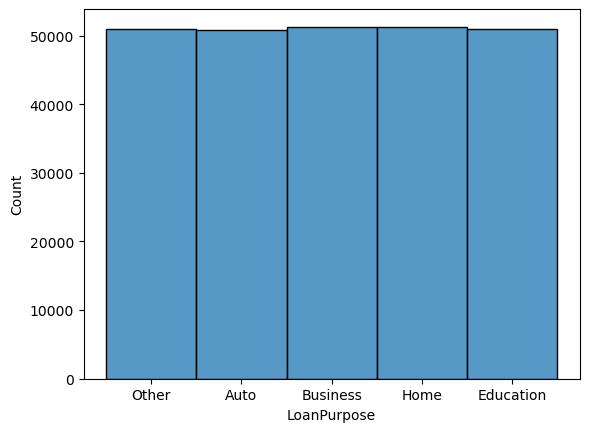

In [96]:
# Loan purpose

# distribution 

sns.histplot(LoanData['LoanPurpose']) # equal distribution

<Axes: xlabel='LoanPurpose', ylabel='Count'>

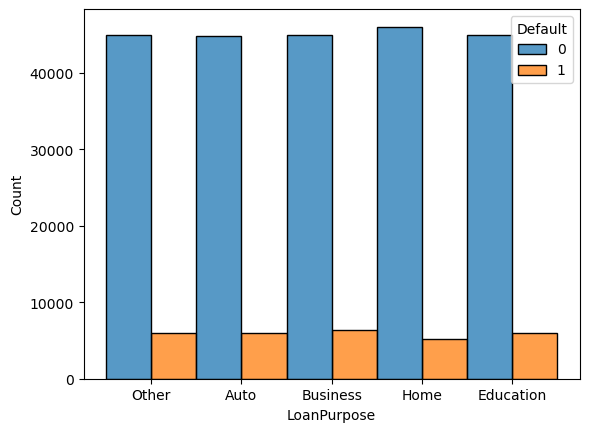

In [97]:
# Are there differences in the loan purposes between those that default and those 
# that don't? 

sns.histplot(LoanData, x = 'LoanPurpose', hue = group, multiple = 'dodge')

# Interpret: same partitioning across Default and NoDefault

In [98]:
# Do people of diff. income groups get loans for diff reasons? 

pd.crosstab(LoanData['LoanPurpose'], LoanData['IncomeGroup'], normalize = 'columns')

# no real differences

IncomeGroup,Low,Lower-Middle,Middle,Upper
LoanPurpose,,,,
Auto,0.198683,0.199661,0.197823,0.199603
Business,0.198120,0.198549,0.201129,0.202645
Education,0.203155,0.200491,0.199371,0.198713
Home,0.199880,0.201991,0.201094,0.200397
Other,0.200162,0.199308,0.200584,0.198642


In [99]:
# Do people from different age groups get loans for different reasons? 

pd.crosstab(LoanData['LoanPurpose'], LoanData['AgeGroup'], normalize = 'columns')

# no real differences 

AgeGroup,18-30,30-40,40-50,50-60,60+
LoanPurpose,,,,,
Auto,0.199307,0.198157,0.197557,0.198275,0.202271
Business,0.202719,0.202097,0.199247,0.201713,0.198330
Education,0.200570,0.200461,0.199572,0.199373,0.198595
Home,0.199666,0.202097,0.203849,0.199007,0.199841
Other,0.197738,0.197187,0.199776,0.201632,0.200964


In [100]:
# Are people more likely to default because of one loan type than another?

pd.crosstab(LoanData['LoanPurpose'], LoanData['Default'], normalize = 'columns')

# maybe slight difference with homes but other than that no real variability

Default,0,1
LoanPurpose,,
Auto,0.198512,0.203723
Business,0.199274,0.213233
Education,0.199239,0.203622
Home,0.203980,0.177014
Other,0.198995,0.202408


<Axes: xlabel='HasCoSigner', ylabel='Count'>

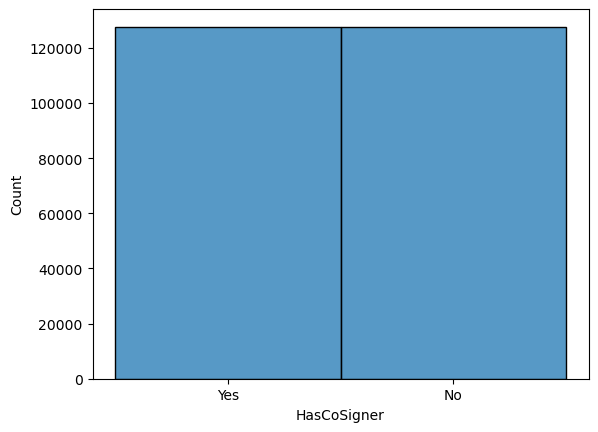

In [101]:
# HasCoSigner

# General distribution

sns.histplot(LoanData['HasCoSigner']) # same count of both 

<Axes: xlabel='HasCoSigner', ylabel='Count'>

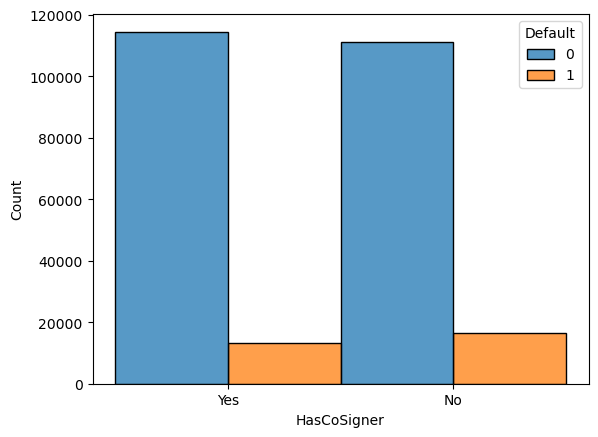

In [102]:
# Is there a differences between the default groups? 

sns.histplot(LoanData, x= 'HasCoSigner', hue = group, multiple = 'dodge')

# interpret: For both groups the proba. seem to be the same 

In [103]:
# check 

pd.crosstab(LoanData['HasCoSigner'], LoanData['Default'], normalize = 'columns')

# those that do not have Cosigner may be slightly more likely to default? 
# Theory: maybe those with Cosigner feel social pressure given loan will fall on 
# Cosigner if they fail to repay 

Default,0,1
HasCoSigner,,
No,0.492804,0.553839
Yes,0.507196,0.446161


# General conclusions from initial EDA

In [104]:
#  Default imbalanced --> need to rebalance to be able to model properly 
# No substantial differences across the independent variables for the two classes 
# How is this possible? --> Synthetic dataset --> likely to be poorly designed
# No real dependencies in the data

# Balance the dataset --> SMOTE

In [204]:
# Conversion of single class attributes 

# applicable for : HasMortgage, HasDependents, HasCoSigner

# Make changes on copy of data in case 
LoanData2 = LoanData
LoanData2.head()



,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasDependents,LoanPurpose,HasCoSigner,Default,YearsEmployed,LoanTerm_In_Years,DTI_Classification,CreditScoreRating,AgeGroup,IncomeGroup
0,56,85994.0,50587.0,520,80,4,0.1523,36,0.44,Bachelor's,...,1,Other,1,0,6.7,3.0,Bad,Poor,50-60,Middle
1,69,50432.0,124440.0,458,15,1,0.0481,60,0.68,Master's,...,0,Other,1,0,1.2,5.0,Bad,Poor,60+,Lower-Middle
2,46,84208.0,129188.0,451,26,3,0.2117,24,0.31,Master's,...,1,Auto,0,1,2.2,2.0,Good,Poor,40-50,Middle
3,32,31713.0,44799.0,743,0,3,0.0707,24,0.23,High School,...,0,Business,0,0,0.0,2.0,Good,Very Good,30-40,Lower-Middle
4,60,20437.0,9139.0,633,8,4,0.0651,48,0.73,Bachelor's,...,1,Auto,0,0,0.7,4.0,Bad,Fair,60+,Low


In [205]:
LoanData2.HasMortgage.replace(('Yes', 'No'), (1, 0), inplace=True)

In [206]:
LoanData2.HasDependents.replace(('Yes', 'No'), (1, 0), inplace=True)
LoanData2.HasCoSigner.replace(('Yes', 'No'), (1, 0), inplace=True)

In [207]:
# convert remaining categorical variables using get_dummies

Dummies = pd.get_dummies(LoanData2[['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']])

In [208]:
# Concat dummied columns
LoanData2 = pd.concat([LoanData2, Dummies], axis = 1)

In [209]:
LoanData2.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,...,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,0.134928,36.025894,0.500212,0.500014,...,0.249488,0.249950,0.333010,0.334063,0.332927,0.199117,0.200895,0.199748,0.200848,0.199391
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,0.066364,16.969330,0.230917,0.500001,...,0.432718,0.432985,0.471291,0.471663,0.471262,0.399337,0.400671,0.399812,0.400636,0.399544
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,0.020000,12.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,0.077700,24.000000,0.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,0.134600,36.000000,0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,0.192500,48.000000,0.700000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,0.250000,60.000000,0.900000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
# Extract numerical attributes for transformation

# check data types 
LoanData2.dtypes

LoanData2 = LoanData2._get_numeric_data()
LoanData2

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994.0,50587.0,520,80,4,0.1523,36,0.44,1,...,0,0,1,0,0,0,0,0,0,1
1,69,50432.0,124440.0,458,15,1,0.0481,60,0.68,0,...,0,0,0,1,0,0,0,0,0,1
2,46,84208.0,129188.0,451,26,3,0.2117,24,0.31,1,...,0,1,1,0,0,1,0,0,0,0
3,32,31713.0,44799.0,743,0,3,0.0707,24,0.23,0,...,0,0,0,1,0,0,1,0,0,0
4,60,20437.0,9139.0,633,8,4,0.0651,48,0.73,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979.0,210682.0,541,109,4,0.1411,12,0.85,0,...,0,0,0,1,0,0,0,0,0,1
255343,32,51953.0,189899.0,511,14,2,0.1155,24,0.21,0,...,0,0,1,0,0,0,0,0,1,0
255344,56,84820.0,208294.0,597,70,3,0.0529,60,0.50,1,...,1,0,0,1,0,1,0,0,0,0
255345,42,85109.0,60575.0,809,40,1,0.2090,48,0.44,1,...,0,0,0,0,1,0,0,0,0,1


In [211]:
# SMOTE Transformation 

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

X = LoanData2.drop(['Default'], axis = 1)
y = LoanData2['Default']

sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)



Text(0.5, 1.0, 'Count of Default Class on Balanced Dataset')

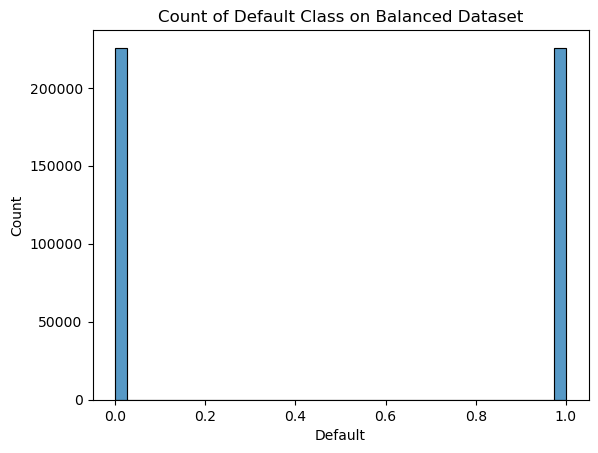

In [212]:
# Represent graphically 

sns.histplot(y_res)
plt.title('Count of Default Class on Balanced Dataset')

In [213]:
# Attach X_res, y_res to assemble new dataset 

LoanData2 = pd.concat([X_res, y_res], axis = 1)
LoanData2.shape

(451388, 31)

In [214]:
LoanData2['Default'].value_counts()

0    225694
1    225694
Name: Default, dtype: int64

# Numerical Analysis Part 2

In [215]:
# re-perform outlier detection on new data 

outlier_detection(LoanData2, num_features)

{'Age': [-6.5, 85.5],
 'Income': [-64728.38126032961, 219249.82875619776],
 'LoanAmount': [-108966.40633833548, 381111.0438030013],
 'CreditScore': [82.0, 1050.0],
 'MonthsEmployed': [-51.5, 160.5],
 'NumCreditLines': [-2.0, 6.0],
 'InterestRate': [-0.05370634447743572, 0.3476439074623928],
 'LoanTerm': [-12.0, 84.0],
 'DTIRatio': [-0.195, 1.205]}

In [216]:
# Interpret: no real outliers to worry about 

Text(0.5, 1.0, 'Count of Loan Applicants in each Age Group')

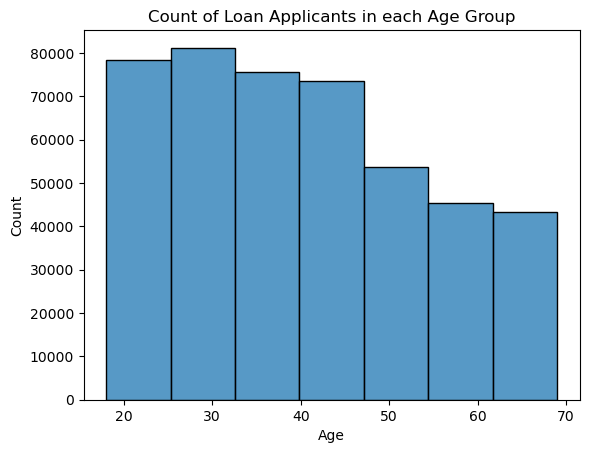

In [217]:
# Age 

# visualise distribution of age 

sns.histplot(LoanData2, x= 'Age', bins = 7)
plt.title('Count of Loan Applicants in each Age Group')

In [218]:
# Interpret: Age is mildly skewed --> more young applicants than elder 
# --> more realistic 

Text(0.5, 1.0, 'Count of Applicants in Each Age Group by Default Class')

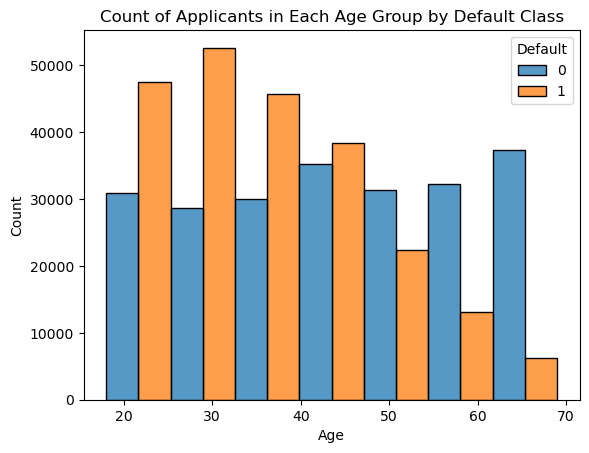

In [219]:
# How does age group differ for those that default vs those that do not default?

# reset group seperator 
group = LoanData2['Default']

sns.histplot(LoanData2, x = 'Age', bins = 7, hue = group, multiple = 'dodge')
plt.title('Count of Applicants in Each Age Group by Default Class')

In [220]:
# Interpret: There are more defaults among younger loan applicants 

# --> seems more realistic --> younger loan applicants are probably 
# more likely to default as they have lower income (in reality, not necessarily applicable 
# to this dataset)

In [221]:
# Get probability 

# reapply age group categorization 

conditions = [
    (LoanData2['Age'] >=18) & (LoanData2['Age'] < 30),
    (LoanData2['Age'] >= 30) & (LoanData2['Age'] < 40),
    (LoanData2['Age'] >= 40) & (LoanData2['Age'] < 50),
    (LoanData2['Age'] >= 50) & (LoanData2['Age'] < 60),
    (LoanData2['Age'] >= 60)
    
    
]

values = ['18-30', '30-40', '40-50', '50-60', '60+']


LoanData2['AgeGroup'] = np.select(conditions, values)

# reapply income group categorization
conditions = [
    (LoanData2['Income'] >=15000) & (LoanData2['Income'] < 30000),
    (LoanData2['Income'] >= 30000) & (LoanData2['Income'] < 60000),
    (LoanData2['Income'] >= 60000) & (LoanData2['Income'] < 90000),
    (LoanData2['Income'] >= 90000) & (LoanData2['Income'] < 150000)
    
    
    
]

values = ['Low', 'Lower-Middle', 'Middle', 'Upper']


LoanData2['IncomeGroup'] = np.select(conditions, values)



pd.crosstab(LoanData2['AgeGroup'], LoanData2['Default'], normalize = 'columns')

Default,0,1
AgeGroup,,
18-30,0.208543,0.345508
30-40,0.188153,0.300150
40-50,0.195601,0.202814
50-60,0.201835,0.111044
60+,0.205867,0.040484


In [222]:
# Interpret: Significantly more defaults among 18-30 AgeGroup
# As Age increases, probability of default decreases 

In [223]:
# How is income group distributed across age group 

pd.crosstab(LoanData2['AgeGroup'], LoanData2['IncomeGroup'], normalize = 'columns')

IncomeGroup,Low,Lower-Middle,Middle,Upper
AgeGroup,,,,
18-30,0.273434,0.278632,0.273286,0.279420
30-40,0.259965,0.245863,0.240288,0.239140
40-50,0.212285,0.200737,0.199287,0.193293
50-60,0.153291,0.156517,0.159014,0.156257
60+,0.101025,0.118251,0.128125,0.131890


<Axes: xlabel='AgeGroup', ylabel='Count'>

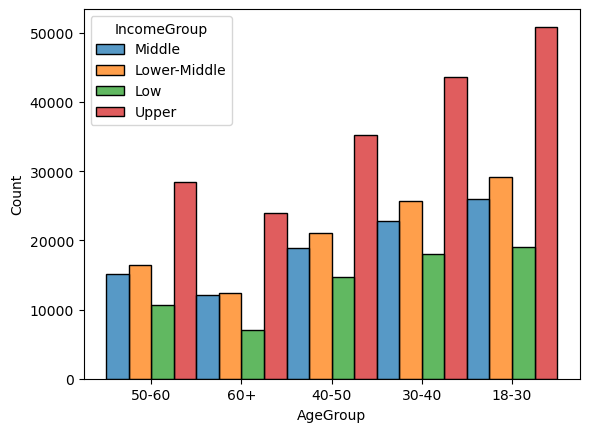

In [224]:
# Visualize Income distribution among age groups 

sns.histplot(LoanData2, x = 'AgeGroup', hue = LoanData2['IncomeGroup'], multiple = 'dodge')

Text(0.5, 1.0, 'Count of applicants in each income group')

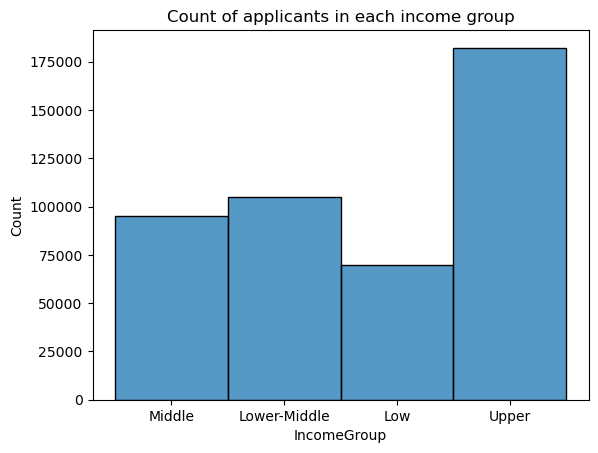

In [225]:
sns.histplot(LoanData2, x = 'IncomeGroup')
plt.title('Count of applicants in each income group')

In [226]:
# get values 

pd.crosstab(LoanData['IncomeGroup'], LoanData['AgeGroup'], normalize = 'columns')

AgeGroup,18-30,30-40,40-50,50-60,60+
IncomeGroup,,,,,
Low,0.111509,0.110505,0.111810,0.111355,0.110916
Lower-Middle,0.222711,0.221091,0.221503,0.223545,0.220280
Middle,0.218788,0.222950,0.225229,0.225172,0.222281
Upper,0.446992,0.445455,0.441458,0.439928,0.446523


In [227]:
# Interpret: No significant differences between age gorups-->proportions seem to be the same 

In [228]:
# Look at CreditScoreRating by age group

# Recreate credit score rating system
conditions = [
    (LoanData2['CreditScore'] >=300) & (LoanData2['CreditScore'] < 580),
    (LoanData2['CreditScore'] >= 580) & (LoanData2['CreditScore'] < 670),
    (LoanData2['CreditScore'] >= 670) & (LoanData2['CreditScore'] < 740),
    (LoanData2['CreditScore'] >= 740) & (LoanData2['CreditScore'] < 800),
    (LoanData2['CreditScore'] >= 800)
    
    
]

values = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

LoanData2['CreditScoreRating'] = np.select(conditions, values)

<Axes: xlabel='CreditScoreRating', ylabel='Count'>

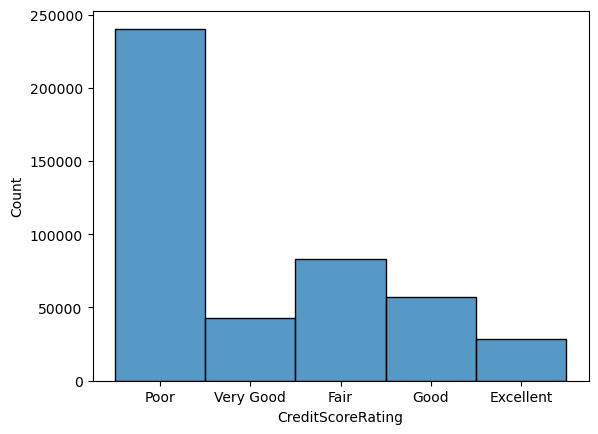

In [229]:
# Credit score rating 

sns.histplot(LoanData2['CreditScoreRating'])

In [230]:
#CreditScoreRating by Age Group 

pd.crosstab(LoanData['AgeGroup'], LoanData['CreditScoreRating'], normalize = 'columns')



CreditScoreRating,Poor,Fair,Good,Very Good,Excellent
AgeGroup,,,,,
18-30,0.229291,0.227854,0.231846,0.230855,0.229674
30-40,0.193944,0.194184,0.194930,0.192494,0.192517
40-50,0.192147,0.192081,0.190503,0.193828,0.194478
50-60,0.193530,0.193849,0.190534,0.190547,0.189151
60+,0.191088,0.192033,0.192187,0.192277,0.194179


<Axes: xlabel='CreditScoreRating', ylabel='Count'>

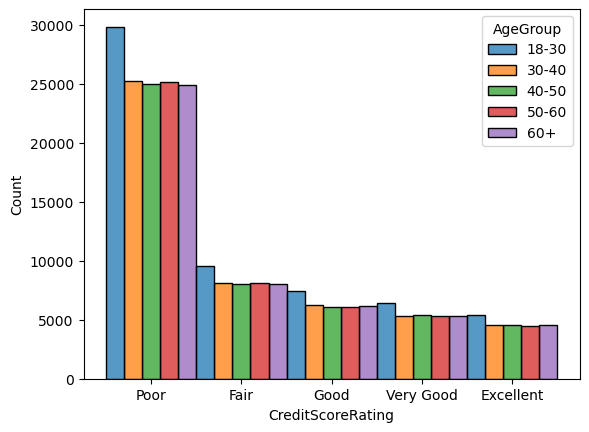

In [231]:
# Plot

groups2 = LoanData['AgeGroup']

sns.histplot(data = LoanData, x = 'CreditScoreRating', hue = 'AgeGroup', multiple = 'dodge')

# Interpret: Proportions are more or les the same 

In [232]:
# Look at Age Group and HasDependents relationship

pd.crosstab(LoanData['AgeGroup'], LoanData['HasDependents'], normalize = 'columns')

# 18-30 seem to have slightly less kids but otherwise more or less the same 

HasDependents,0,1
AgeGroup,,
18-30,0.229325,0.229838
30-40,0.194365,0.193272
40-50,0.191897,0.192756
50-60,0.193809,0.191151
60+,0.190604,0.192983


<Axes: xlabel='Income', ylabel='Count'>

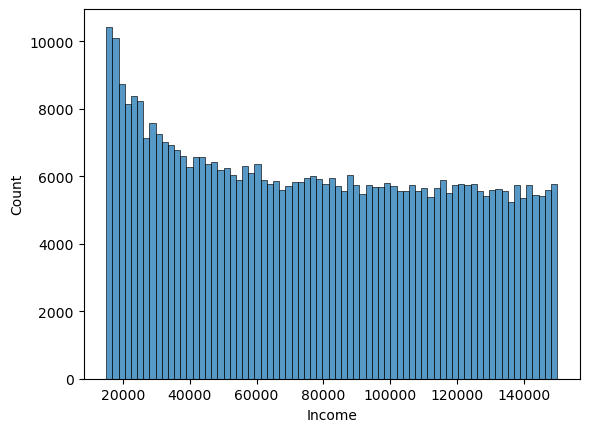

In [233]:
# Income

# General distribution 

sns.histplot(LoanData2['Income']) # more skewed to the left

<Axes: xlabel='IncomeGroup', ylabel='Count'>

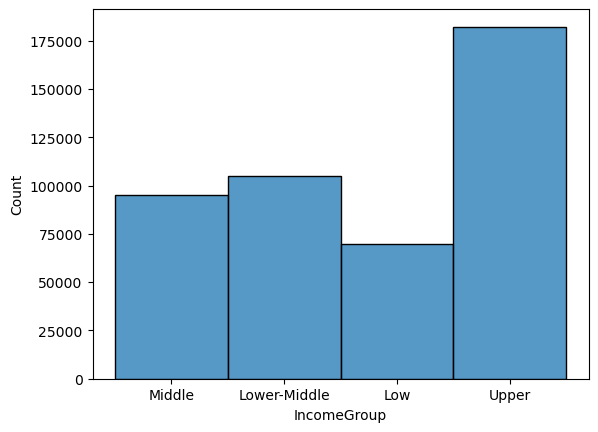

In [234]:
## Plot the income groups 

sns.histplot(LoanData2, x = 'IncomeGroup') # significant proportion of individuals have high income

In [235]:
# Look at actuall Proportions 

(LoanData2['IncomeGroup'].value_counts()/451388) * 100

Upper           40.358627
Lower-Middle    23.215947
Middle          21.013629
Low             15.411797
Name: IncomeGroup, dtype: float64

In [236]:
# 40% are high income, 21% are middle, 23% are Lower-Middle, 15% are Low

In [237]:
# Does this change depending on the default group of the individual? 

pd.crosstab(LoanData2['IncomeGroup'], LoanData2['Default'], normalize = 'columns')

Default,0,1
IncomeGroup,,
Low,0.098213,0.210023
Lower-Middle,0.218920,0.245399
Middle,0.226391,0.193882
Upper,0.456476,0.350696


In [238]:
# Interpret: Income group distribution is different for the default groups 

# -->  Higher proportion of high income individuals in high income group (relative to no default group)

<Axes: xlabel='IncomeGroup', ylabel='Count'>

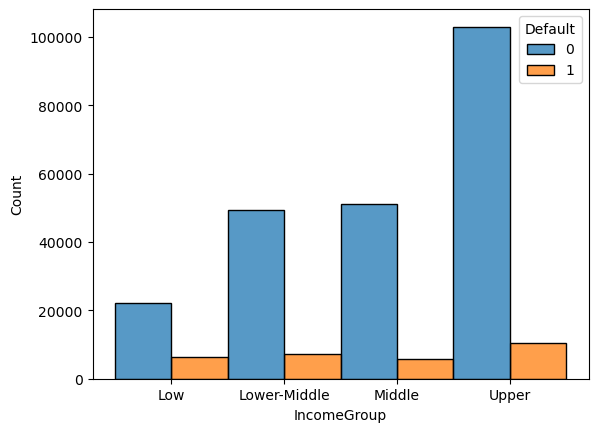

In [239]:
# Represent graphically: 

sns.histplot(LoanData, x = 'IncomeGroup', hue = group, multiple = 'dodge')

In [240]:
# Is average years employed different for the different income groups? 

LoanData['YearsEmployed'].groupby(LoanData['IncomeGroup']).mean() # same all across 

IncomeGroup
Low             4.941117
Lower-Middle    4.951978
Middle          4.968224
Upper           4.968729
Name: YearsEmployed, dtype: float64

In [241]:
# Median

LoanData['YearsEmployed'].groupby(LoanData['IncomeGroup']).median()

IncomeGroup
Low             4.9
Lower-Middle    4.9
Middle          5.0
Upper           5.0
Name: YearsEmployed, dtype: float64

In [242]:
# Add DTI_Classification to new dataset 

LoanData2['DTI_Classification'] = np.where((LoanData2['DTIRatio'] <= 0.36), 'Good', 'Bad')


In [243]:
# Look at DTI Ratio rating differences for the different income groups 

pd.crosstab(LoanData2['IncomeGroup'], LoanData2['DTI_Classification'], normalize = 'columns')

# same results for the different DTI Ratio groups 

DTI_Classification,Bad,Good
IncomeGroup,,
Low,0.156952,0.147203
Lower-Middle,0.232685,0.230877
Middle,0.210298,0.209741
Upper,0.400065,0.412180


<Axes: xlabel='NumCreditLines', ylabel='Count'>

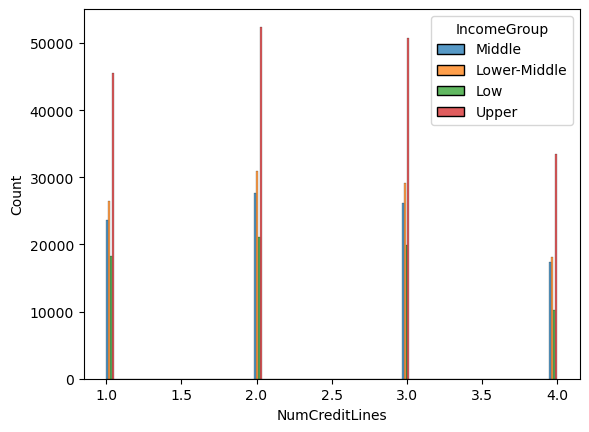

In [244]:
# Do wealthier people have more credit lines? 

groups2 = LoanData2['IncomeGroup']

sns.histplot(LoanData2, x = 'NumCreditLines', hue = groups2, multiple = 'dodge' )

# proportions look the same 

In [245]:
# check 

pd.crosstab(LoanData['IncomeGroup'], LoanData['NumCreditLines'], normalize = 'columns')

# same distributions across income groups

NumCreditLines,1,2,3,4
IncomeGroup,,,,
Low,0.112802,0.109761,0.111398,0.110968
Lower-Middle,0.220741,0.220069,0.221904,0.224725
Middle,0.222299,0.224497,0.222546,0.221576
Upper,0.444158,0.445673,0.444152,0.442730


<Axes: xlabel='LoanAmount', ylabel='Count'>

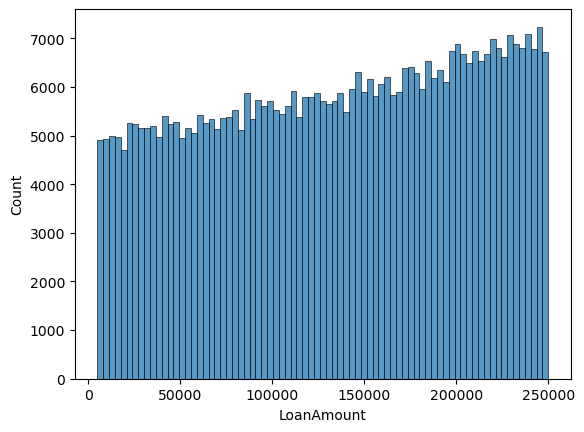

In [246]:
# LoanAmount

# general distribution 

sns.histplot(LoanData2['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

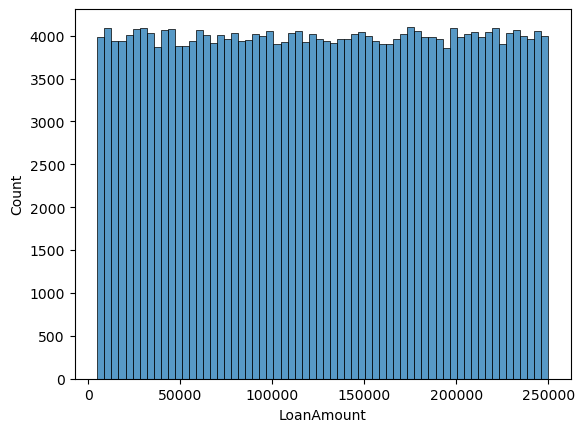

In [247]:
# comppare to original data 

sns.histplot(LoanData['LoanAmount'])

In [248]:
# Interpret: transformed data is slightly more skewed to the right 

# means in our modified data, more high income individuals apply for larger loans --> realistic

<Axes: xlabel='LoanAmount', ylabel='Count'>

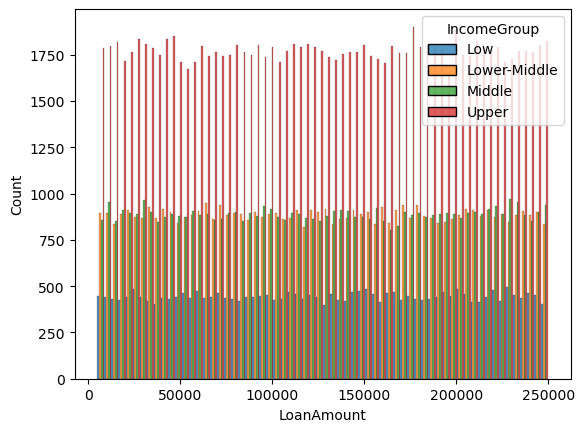

In [249]:
# Look at it from IncomeGroup perspective 

sns.histplot(LoanData2, x = 'LoanAmount', hue = LoanData['IncomeGroup'], multiple = 'dodge')

# interpre: moore or less the same across

<Axes: xlabel='CreditScoreRating', ylabel='Count'>

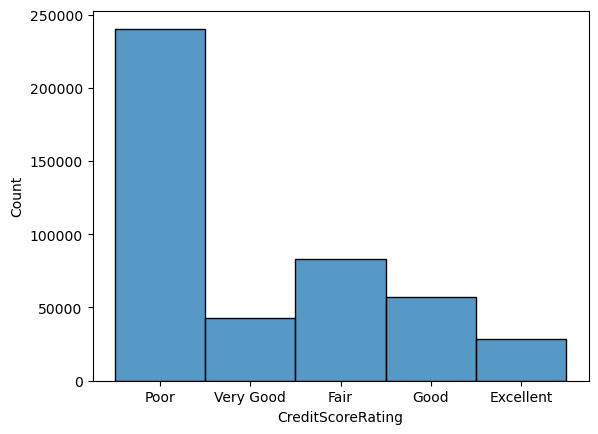

In [250]:
# CreditScoreRating


# Distribution

sns.histplot(LoanData2['CreditScoreRating']) # same proportions as original data

In [251]:
# Interpret: 
# Significant amount of people have poor credit score rating 

<Axes: xlabel='CreditScoreRating', ylabel='Count'>

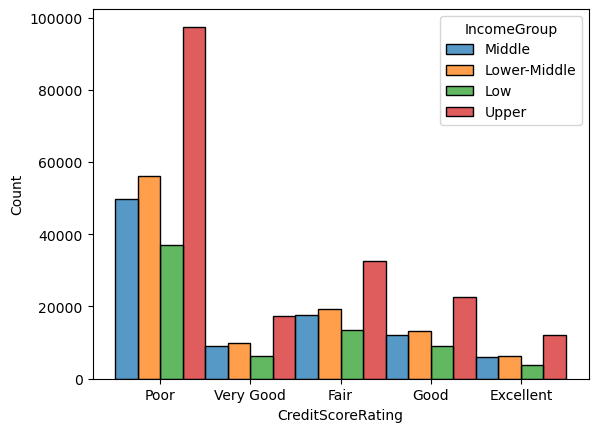

In [252]:
# Does this differ for the different income groups? 

sns.histplot(LoanData2, x = 'CreditScoreRating', hue = LoanData2['IncomeGroup'], multiple = 'dodge')

In [253]:
# interpet: 

# Proportions seem more or less the same at all credit score rating groups
# BUT 

In [254]:
# Look at it numerically 

pd.crosstab(LoanData2['CreditScoreRating'], LoanData2['IncomeGroup'], normalize = 'columns')

# proportions very similar throughout

IncomeGroup,Low,Lower-Middle,Middle,Upper
CreditScoreRating,,,,
Excellent,0.054494,0.060003,0.064278,0.067095
Fair,0.192606,0.184362,0.186510,0.179087
Good,0.130709,0.125475,0.128873,0.123843
Poor,0.531387,0.535250,0.525192,0.535043
Very Good,0.090805,0.094910,0.095147,0.094931


<Axes: xlabel='CreditScoreRating', ylabel='Count'>

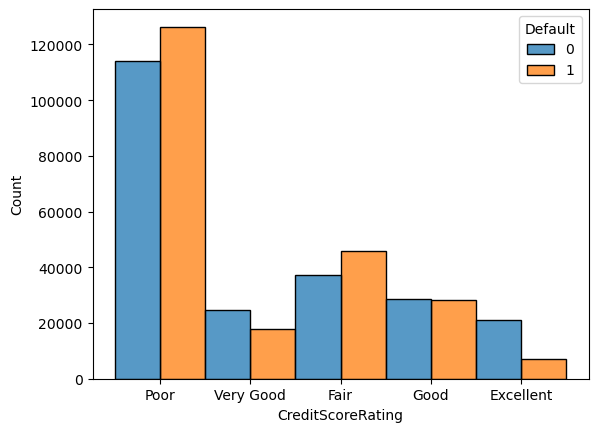

In [255]:
# Are there differences in credit score rating between those that default and those that do not default 

sns.histplot(LoanData2 , x = 'CreditScoreRating', hue = group, multiple = 'dodge')

# Higher proportion of low credit score groups default than high credit score groups 

In [256]:
# look numerically 

pd.crosstab(LoanData2['CreditScoreRating'], LoanData2['Default'], normalize = 'columns')

Default,0,1
CreditScoreRating,,
Excellent,0.093777,0.032052
Fair,0.164218,0.203692
Good,0.127004,0.125670
Poor,0.505011,0.559904
Very Good,0.109990,0.078682


In [257]:
# Interpret: As Credit Score increases, probability decreases ? 
# Proportion of people that default decreases as we go across the credit score rating classes 

<Axes: xlabel='CreditScoreRating', ylabel='Count'>

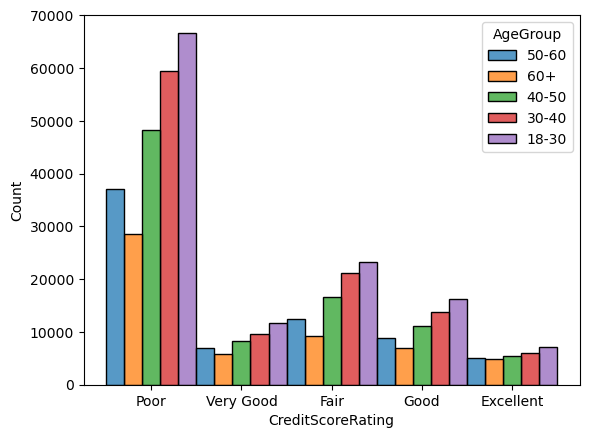

In [258]:
# How do credit score differ across age groups? 

sns.histplot(LoanData2, x = 'CreditScoreRating', hue = LoanData2['AgeGroup'], multiple = 'dodge')

# same proportions at each age group levels

<Axes: xlabel='YearsEmployed', ylabel='Count'>

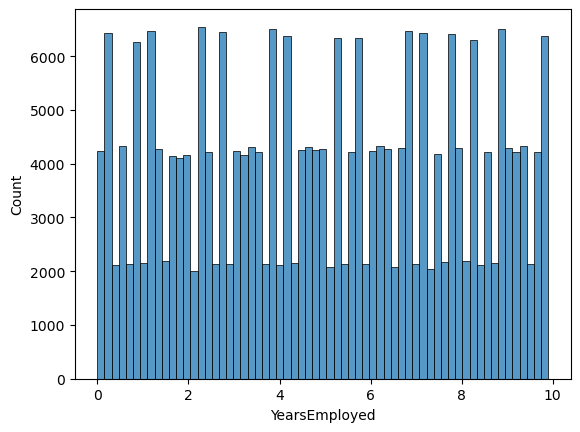

In [259]:
# YearsEmployed 

## distribution

sns.histplot(LoanData['YearsEmployed'])

<Axes: xlabel='YearsEmployed', ylabel='Count'>

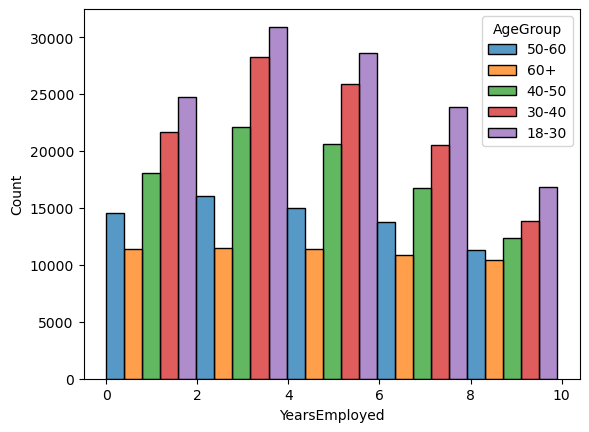

In [260]:
# How does it differ across age groups? 

sns.histplot(LoanData2, x = 'YearsEmployed', hue = LoanData2['AgeGroup'], multiple = 'dodge', bins = 5)


# same distribution for all years 

<Axes: xlabel='YearsEmployed', ylabel='Count'>

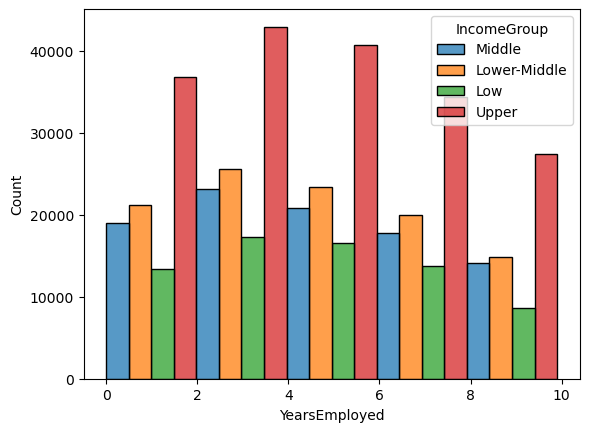

In [261]:
# Could there be a relationship between years employed and income 

sns.histplot(LoanData2, x = 'YearsEmployed', hue = LoanData2['IncomeGroup'], multiple = 'dodge', bins = 5)

# proportions the same 

In [262]:
# What do the average and median incomes look like for the years employed 

MedYE = LoanData2['Income'].groupby(round(LoanData2['YearsEmployed'])).median()
MeanYE = LoanData2['Income'].groupby(round(LoanData2['YearsEmployed'])).mean()

print('Median Income For Number of Years Employed:', MedYE)
print('Mean Income For Number of Years Employed:', MeanYE)

Median Income For Number of Years Employed: YearsEmployed
0.0     79705.000000
1.0     75964.000000
2.0     75215.852106
3.0     75013.911912
4.0     75399.357789
5.0     75783.548394
6.0     75886.058737
7.0     75316.000000
8.0     76353.500000
9.0     79835.000000
10.0    82105.011167
Name: Income, dtype: float64
Mean Income For Number of Years Employed: YearsEmployed
0.0     80094.174154
1.0     77975.704533
2.0     77503.261217
3.0     77239.436646
4.0     77177.342960
5.0     77210.431969
6.0     77538.275449
7.0     77068.134637
8.0     77747.689366
9.0     80158.719631
10.0    82364.841846
Name: Income, dtype: float64


In [263]:
# Interpret: 

#Median: 75k for most, but 79k at years ==0, 79k at years ==9, 82k at years ==10
#Mean: 77k for most, but 80k at years ==0, 80k at years ==9, 82k at years ==10

# --> these results do not make much sense 
# Expect the highest to be at or arround mployed 
# but income levels surprisingly high for the low emp. end 

<Axes: xlabel='NumCreditLines', ylabel='Count'>

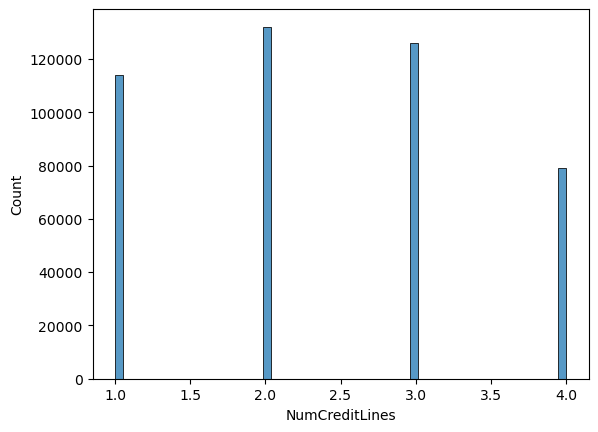

In [264]:
# NumCreditLines 

## general distribution 

sns.histplot(LoanData2, x = 'NumCreditLines') # slighly more people have 2 or 3 credit lines

<Axes: xlabel='NumCreditLines', ylabel='Count'>

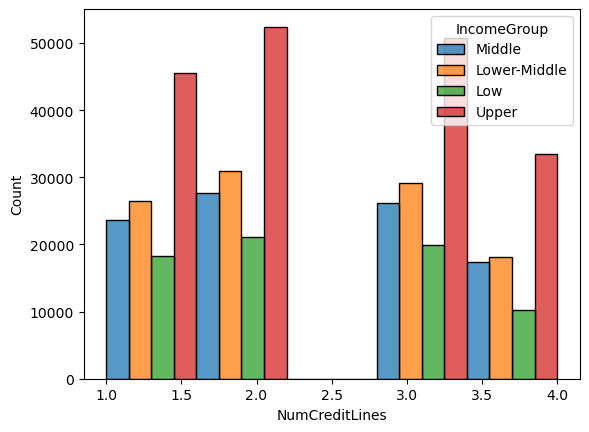

In [265]:
# are there income differences between those with more credit lines? 

sns.histplot(LoanData2, x = 'NumCreditLines', hue = LoanData2['IncomeGroup'], multiple = 'dodge', bins = 5)



In [266]:
# Interpret: Same pattern throughout 

<Axes: xlabel='NumCreditLines', ylabel='Count'>

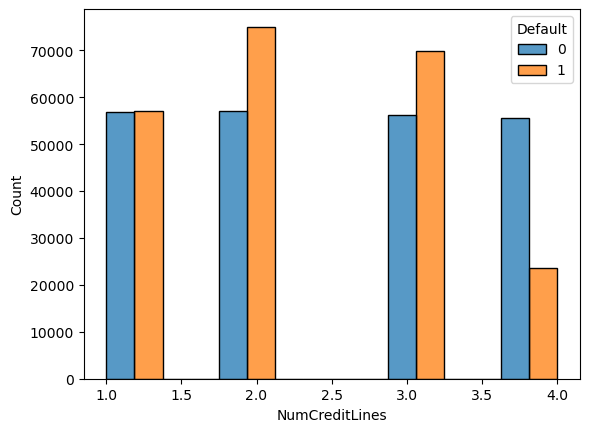

In [267]:
# Is there a diff in the number of credit lines between default classes? 

sns.histplot(LoanData2 , x = 'NumCreditLines', hue = group, multiple = 'dodge', bins = 8)

# Out of those with 1 credit line --> split 50/50 across the two classes 
# Out of those with 2 credit lines --> 29% more applicants default 
# Out of those with 3 credit lines --> About 20% more people default
# Out of those with 4 credit lines --> significantly less people default 

# interpret: 1 credit lines --> about 50/50
# As nu. credit lines increase, the proba. of default increases 
# BUT this is only up to a point at which the people with the most 
# credit lines default significantly less 

<Axes: xlabel='LoanAmount', ylabel='Count'>

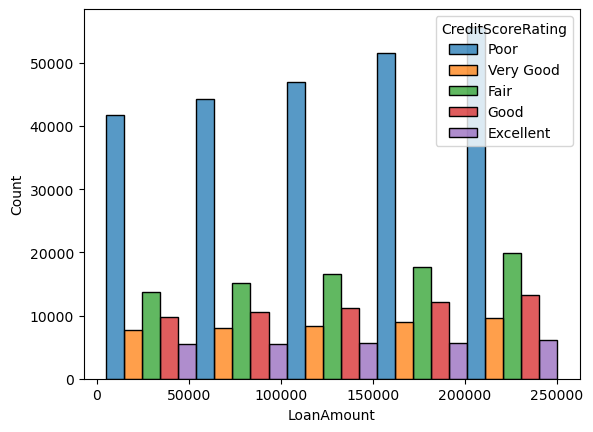

In [268]:
# Do people with higher credit score ratings have more credit lines? 

sns.histplot(LoanData2, x = round(LoanData2['LoanAmount']), 
             hue= LoanData2['CreditScoreRating'], multiple = 'dodge',
            bins = 5)

# Interpret: same pattern throughout

<Axes: xlabel='LoanAmount', ylabel='Count'>

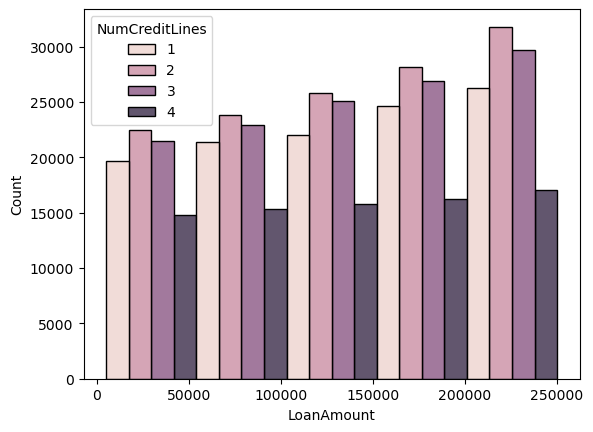

In [269]:
# Do people that take out larger laons have more credit lines? 

sns.histplot(LoanData2, x = round(LoanData2['LoanAmount']),
            hue = LoanData2['NumCreditLines'], multiple = 'dodge',
            bins = 5)

# interpret: same pattern throughout

<Axes: xlabel='LoanTerm_In_Years', ylabel='Count'>

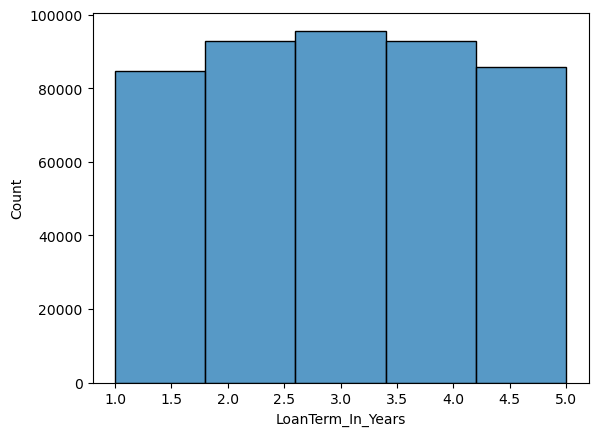

In [270]:
# LoanTerm

## Distribution

sns.histplot(LoanData2, x = 'LoanTerm_In_Years', bins = 5)

# Loans are for 1 to 5 years A
# Slightly more loans are 2 to 4 years long 

<Axes: xlabel='LoanTerm_In_Years', ylabel='Count'>

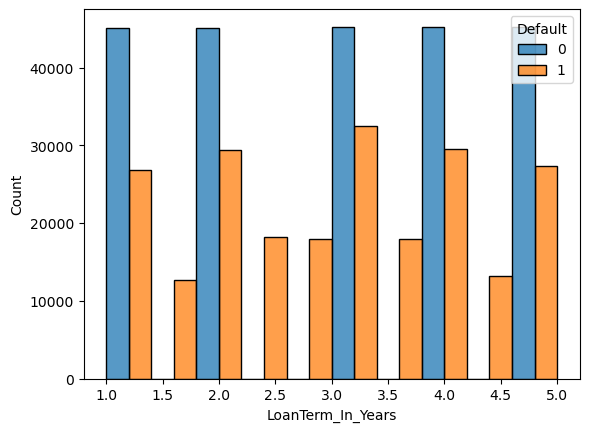

In [271]:
# Is there a difference in loan term length between default groups? 

sns.histplot(LoanData2, x = 'LoanTerm_In_Years', bins = 10, hue = group, multiple = 'dodge')

#Interpret: 

# Those that do not default are uniformally distributed across the LoanTerm dist.
# LoanTerm length iis a lot more varied among the default group

<Axes: xlabel='LoanTerm_In_Years', ylabel='Count'>

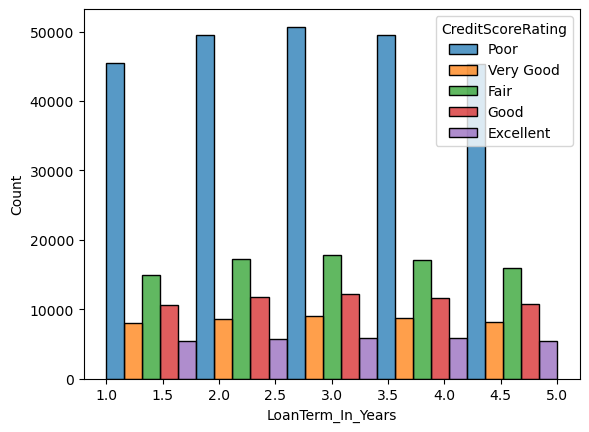

In [272]:
# Maybe credit score rating affect LoanTerm length? 

sns.histplot(LoanData2, x = 'LoanTerm_In_Years', bins = 5, hue = LoanData2['CreditScoreRating'], multiple = 'dodge')

# same pattern throughout so unlikely to be a significant difference

<Axes: xlabel='LoanTerm_In_Years', ylabel='Count'>

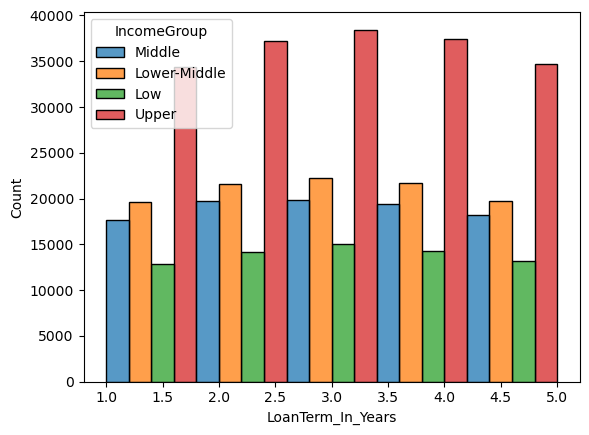

In [273]:
# Is there a difference in loan term duration between the different income groups? 

sns.histplot(LoanData2, x = 'LoanTerm_In_Years',
             hue = LoanData2['IncomeGroup'],
             multiple = 'dodge',
            bins = 5)

In [274]:
# Are there any differences in the length of loan terms across the different Income groups? 

LoanData2['LoanTerm_In_Years'].groupby(LoanData2['IncomeGroup']).describe()

# same across all income groups

,count,mean,std,min,25%,50%,75%,max
IncomeGroup,,,,,,,,
Low,69567.0,3.009202,1.274166,1.0,2.0,3.0,4.0,5.0
Lower-Middle,104794.0,3.002508,1.302160,1.0,2.0,3.0,4.0,5.0
Middle,94853.0,3.006844,1.315164,1.0,2.0,3.0,4.0,5.0
Upper,182174.0,3.003418,1.322032,1.0,2.0,3.0,4.0,5.0


In [275]:
# Are there any differences in the length of loan terms across the different AgeGroups? 

LoanData2['LoanTerm_In_Years'].groupby(LoanData2['AgeGroup']).describe()

# same across all age groups

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
18-30,125046.0,3.004201,1.290079,1.0,2.0,3.0,4.0,5.0
30-40,110207.0,3.014521,1.269939,1.0,2.0,3.0,4.0,5.0
40-50,89920.0,2.998302,1.296940,1.0,2.0,3.0,4.0,5.0
50-60,70615.0,3.005462,1.345629,1.0,2.0,3.0,4.0,5.0
60+,55600.0,2.996694,1.394464,1.0,2.0,3.0,4.0,5.0


<Axes: xlabel='DTIRatio', ylabel='Count'>

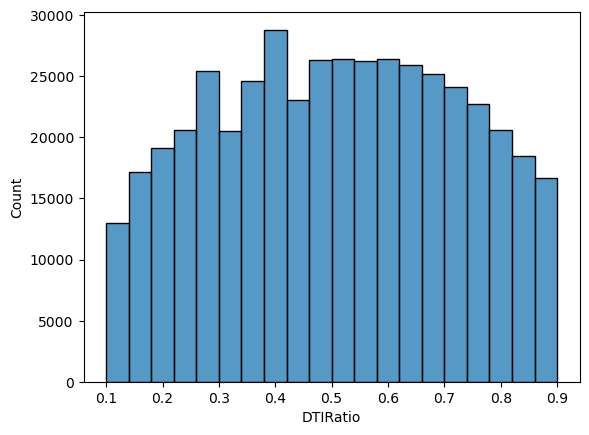

In [276]:
# DTI Ratio

## Distribution 

sns.histplot(LoanData2, x = 'DTIRatio', bins = 20) # seems fairly normally distributed

<Axes: xlabel='DTIRatio', ylabel='Count'>

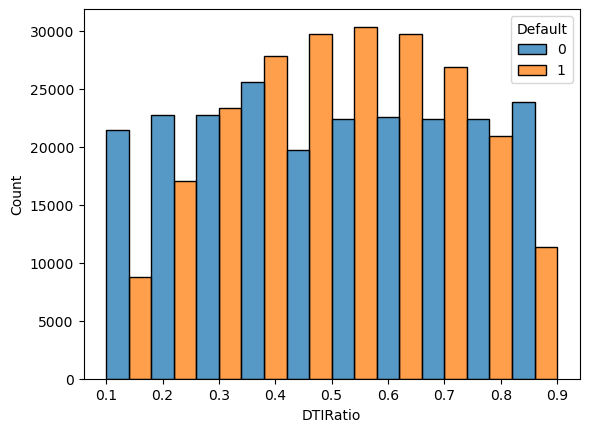

In [277]:
# Is there a difference between the Default class types? 

sns.histplot(LoanData2, x = 'DTIRatio', bins = 10, hue = group, multiple = 'dodge')

# Interpret: Higher amount of defaults among those have higher DTI Ratio (for the most part)

<Axes: xlabel='DTI_Classification', ylabel='Count'>

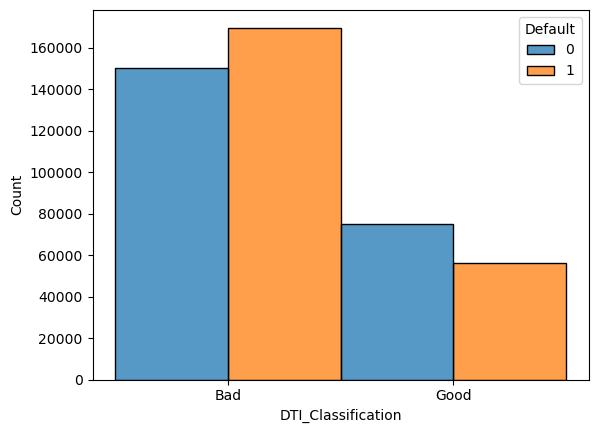

In [278]:
# Same but using our DTI_Class

sns.histplot(LoanData2, x = 'DTI_Classification', hue = group, multiple = 'dodge')

# Bad --> higher proportion of default 
# Good --> higher proportion of no default 

# maybe there is a link between DTI Ratio and the prob. of defaulting

In [279]:
# DTI ratio classification for diff income groups 

pd.crosstab(LoanData2['DTI_Classification'], LoanData2['IncomeGroup'], normalize = 'columns')

# small differences between the income groups

# --> DTI not to do with abs income but debt to income ratio

IncomeGroup,Low,Lower-Middle,Middle,Upper
DTI_Classification,,,,
Bad,0.722383,0.710947,0.709888,0.703152
Good,0.277617,0.289053,0.290112,0.296848


In [280]:
# --> look at average and median loan amounts across the diff income groups 

#Median 
MedInc = LoanData2['LoanAmount'].groupby(LoanData2['IncomeGroup']).median()
MeanInc = LoanData2['LoanAmount'].groupby(LoanData2['IncomeGroup']).mean()

print('Median Loan Amount by Income Group:', MedInc)
print('Mean Loan Amount by Income Group:', MeanInc)

Median Loan Amount by Income Group: IncomeGroup
Low             155037.769847
Lower-Middle    142361.170336
Middle          134753.000000
Upper           131616.866554
Name: LoanAmount, dtype: float64
Mean Loan Amount by Income Group: IncomeGroup
Low             146323.971637
Lower-Middle    137005.785450
Middle          132786.702400
Upper           130481.449276
Name: LoanAmount, dtype: float64


In [281]:
# Interpret: 

# Low Income group takes out larges loans 
# As Income Increases, mean amd median loan decreases 


<Axes: xlabel='DTI_Classification', ylabel='Count'>

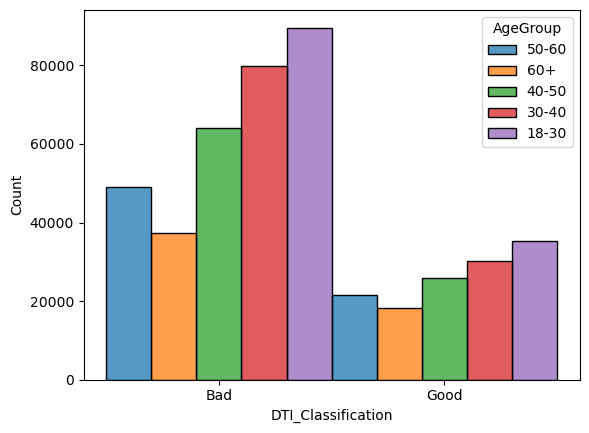

In [282]:
# Suggestion: Maybe younger individuals have worse DTI Ratio? 
# --> in reality, less income, more debt 

sns.histplot(LoanData2, x = 'DTI_Classification', hue = LoanData2['AgeGroup'], multiple = 'dodge')

# Both classes distributed in the same way across age groups

<Axes: xlabel='IncomeGroup', ylabel='Count'>

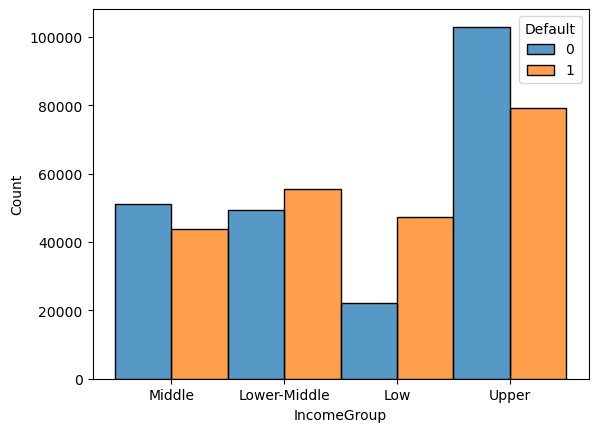

In [283]:
sns.histplot(LoanData2, x = 'IncomeGroup', hue = group, multiple = 'dodge')

# Categorical Variable Analysis

In [284]:
# Has Mortage 

LoanData2.groupby(LoanData2['HasMortgage']).describe()

Age                                                      \
                count       mean        std   min   25%   50%   75%   max   
HasMortgage                                                                 
0            280805.0  39.470821  13.638860  18.0  28.0  38.0  50.0  69.0   
1            170583.0  41.567765  14.540175  18.0  29.0  40.0  54.0  69.0   

               Income                ... LoanPurpose_Other        Default  \
                count          mean  ...               75%  max     count   
HasMortgage                          ...                                    
0            280805.0  76833.519801  ...               0.0  1.0  280805.0   
1            170583.0  79581.298469  ...               0.0  1.0  170583.0   

                                                          
                 mean       std  min  25%  50%  75%  max  
HasMortgage                                               
0            0.601471  0.489596  0.0  0.0  1.0  1.0  1.0  
1            0.332964  0.471275  0.0  0.0  0.0  1.0  1.0  

[2 rows x 240 columns]

<Axes: xlabel='HasMortgage', ylabel='Count'>

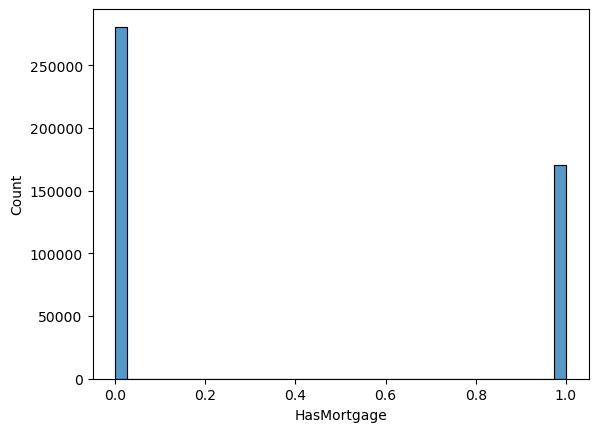

In [285]:
# Distribution

sns.histplot(LoanData2['HasMortgage']) # there are significantly more applicants that do not hve mortgage

<Axes: xlabel='HasMortgage', ylabel='Count'>

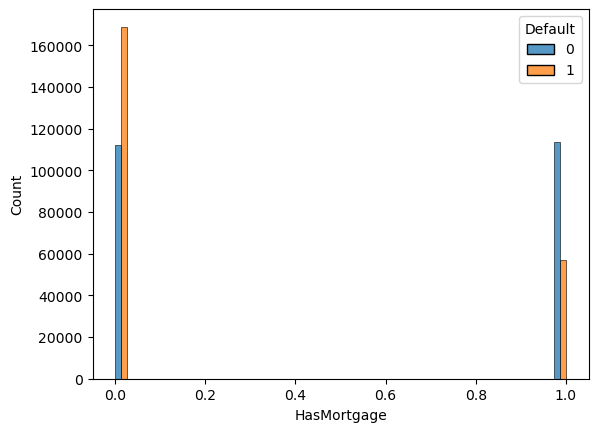

In [286]:
# Is there a diff between the default groups? 

sns.histplot(LoanData2, x = 'HasMortgage', hue = LoanData2['Default'], multiple = 'dodge')

# Interpret: Signficantly more of those that do not have a mortgage default 

# --> those that have a mortgage may be a lot more stable financially 

In [287]:
# Look at it numerically 

pd.crosstab(LoanData2['HasMortgage'], LoanData2['Default'], normalize = 'columns')

# 75% of those that default do not have a mortgage 
# Half of those that do not default have a mortgage

Default,0,1
HasMortgage,,
0,0.495844,0.748341
1,0.504156,0.251659


<Axes: xlabel='HasMortgage', ylabel='Count'>

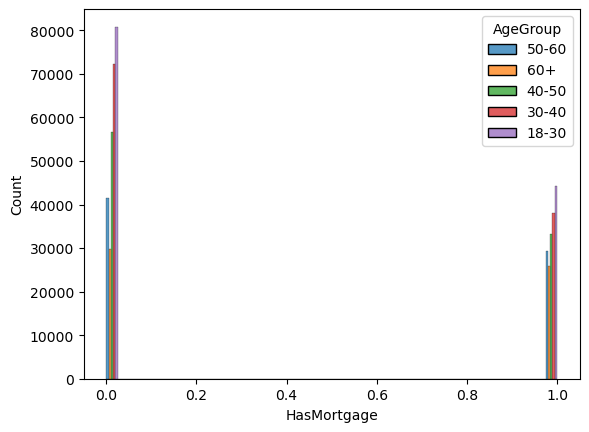

In [288]:
# Are thee diff across age groups of nb of people with mortgages 

sns.histplot(LoanData2, x = 'HasMortgage', hue = LoanData2['AgeGroup'], multiple = 'dodge')

# Proportions the same in the two groups

In [289]:
# What are the creditscores like for those with vs without mortgages? 

pd.crosstab(LoanData2['HasMortgage'], LoanData2['CreditScoreRating'], normalize = 'columns')

# Smaller amont of people with poor credit score have mortgage 
# BUT similar amount to those with very good credit score

CreditScoreRating,Excellent,Fair,Good,Poor,Very Good
HasMortgage,,,,,
0,0.543681,0.642332,0.623336,0.628559,0.596754
1,0.456319,0.357668,0.376664,0.371441,0.403246


In [290]:
# Do same with DTI ratio

pd.crosstab(LoanData2['HasMortgage'], LoanData2['DTI_Classification'], normalize = 'columns') 

# slight diff between the two groups

DTI_Classification,Bad,Good
HasMortgage,,
0,0.631342,0.59952
1,0.368658,0.40048


In [291]:
# Get dummies for IncomeGroup, CreditScoreRating,AgeGroup

Dummies2 =  pd.get_dummies(LoanData2[['AgeGroup', 'IncomeGroup', 'CreditScoreRating']])
LoanData2 = pd.concat([LoanData2, Dummies2], axis = 1)
LoanData2.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,AgeGroup_60+,IncomeGroup_Low,IncomeGroup_Lower-Middle,IncomeGroup_Middle,IncomeGroup_Upper,CreditScoreRating_Excellent,CreditScoreRating_Fair,CreditScoreRating_Good,CreditScoreRating_Poor,CreditScoreRating_Very Good
0,56,85994.0,50587.0,520,80,4,0.1523,36,0.44,1,...,0,0,0,1,0,0,0,0,1,0
1,69,50432.0,124440.0,458,15,1,0.0481,60,0.68,0,...,1,0,1,0,0,0,0,0,1,0
2,46,84208.0,129188.0,451,26,3,0.2117,24,0.31,1,...,0,0,0,1,0,0,0,0,1,0
3,32,31713.0,44799.0,743,0,3,0.0707,24,0.23,0,...,0,0,1,0,0,0,0,0,0,1
4,60,20437.0,9139.0,633,8,4,0.0651,48,0.73,0,...,1,1,0,0,0,0,1,0,0,0


In [292]:
# Drop object versions of categorical variables 

LoanData2 = LoanData2.drop(['AgeGroup', 'IncomeGroup', 'CreditScoreRating'], axis = 1)

In [293]:
sns.histplot(LoanData2['CreditScoreRating'])

KeyError: 'CreditScoreRating'

# Evaluation Function

In [294]:
# import libraries to test performance 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# define function to evaluate the model 

def evaluate_preds(y_true, y_preds):
    
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    
    
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1:{f1:.2f}")
    
    return metric_dict
        
    

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




# Unbalanced Model

In [296]:
# Model before balancing the dataset 

LoanDataOriginal = LoanData.copy()
LoanDataOriginal.shape

(255347, 23)

In [297]:
# 
# Encodings
LoanDataOriginal.HasMortgage.replace(['Yes', 'No'], [1, 0], inplace=True)
LoanDataOriginal.HasDependents.replace(['Yes', 'No'], [1, 0], inplace=True)
LoanDataOriginal.HasCoSigner.replace(['Yes', 'No'], [1, 0], inplace=True)
LoanDataOriginal.DTI_Classification.replace(['Bad', 'Good'], [1,0], inplace = True)

# Convert categoricals
Dummies = pd.get_dummies(LoanDataOriginal[['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 
                                           'CreditScoreRating', 'AgeGroup', 'IncomeGroup']])

# Drop the originals
LoanDataOriginal.drop(['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'CreditScoreRating', 
                       'AgeGroup', 'IncomeGroup'], axis=1, inplace=True)

# Concat
LoanDataOriginal = pd.concat([LoanDataOriginal, Dummies], axis=1)



In [298]:
# building model on original data 

# Split data 

X = LoanDataOriginal.drop('Default', axis = 1)
y = LoanDataOriginal['Default']

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Logistic Regression Model 


# Initialise model 
log_reg = LogisticRegression()

# Fit model on training data 
log_reg.fit(X_train, y_train)


# Make baseline predictions

y_preds = log_reg.predict(X_test)

# Evaluate classifier on test set 
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Accuracy: 88.32%
Precision: 0.50
Recall: 0.00
F1:0.00


C:\Users\Data\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy': 0.88, 'precision': 0.5, 'recall': 0.0, 'f1': 0.0}

Text(0.5, 1.0, 'ROC Plot of Base Model on Balanced Dataset')

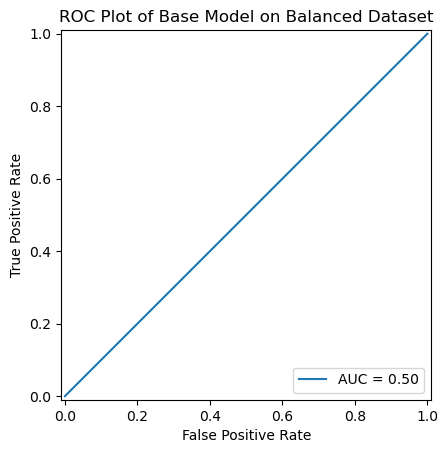

In [299]:
# AUC / ROC
# Implement AUC_score, and ROC curve 

fpr1, tpr1, thresholds = roc_curve(y_test, y_preds)
roc_auc1 = auc(fpr1, tpr1)
display = metrics.RocCurveDisplay(fpr=fpr1, tpr = tpr1, roc_auc = roc_auc1)
display.plot()
plt.title('ROC Plot of Base Model on Balanced Dataset')


In [300]:
# encode dti class in loandata 2 

LoanData2.DTI_Classification.replace(['Bad', 'Good'], [1,0], inplace = True)


# Base Model

In [301]:

# Test model 

LoanData3 = LoanData2.copy()

# Split X, y
X = LoanData3.drop('Default', axis = 1)
y = LoanData3['Default']

# Split train-test
X_train30, X_test30, y_train30, y_test30 = train_test_split(X,y, stratify = y, test_size = 0.2, random_state = 123)



# Initialise 
log_reg2 = LogisticRegression()

# Fit model on training data 
log_reg2.fit(X_train30, y_train30)



# Make predictions

y_preds2 = log_reg2.predict(X_test30)


# Evaluate classifier on test set 
baselog = evaluate_preds(y_test30, y_preds2)
baselog

Accuracy: 63.47%
Precision: 0.64
Recall: 0.61
F1:0.62


C:\Users\Data\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy': 0.63, 'precision': 0.64, 'recall': 0.61, 'f1': 0.62}

In [302]:
# Confusion Matrix 
confusion_matrix(y_test, y_preds2)

ValueError: Found input variables with inconsistent numbers of samples: [51070, 90278]

Text(0.5, 1.0, 'ROC Plot of Base Model on Balanced Dataset')

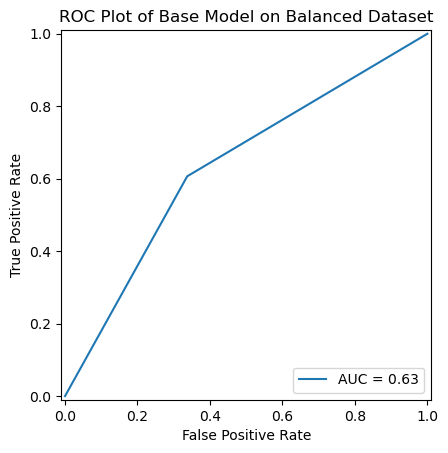

In [303]:
# AUC, ROC
fpr2, tpr2, thresholds = roc_curve(y_test30, y_preds2)
roc_auc2 = auc(fpr2, tpr2)
display = metrics.RocCurveDisplay(fpr=fpr2, tpr = tpr2, roc_auc = roc_auc2)
display.plot()
plt.title('ROC Plot of Base Model on Balanced Dataset')

# Model 2 - Standard Scaler

In [304]:
# Test


# Extract numerical variables
Num = LoanData2[['Age', 'Income', 'LoanAmount', 'CreditScore', 'YearsEmployed',
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']]

# Store categorical attributes
Cat = LoanData2.drop(columns=Num.columns)

# Rebuild dataset
LoanData3 = pd.concat([Num, Cat], axis=1)

# Separate dependent and independent variables
X = LoanData3.drop('Default', axis=1)
y = LoanData3['Default']

# Split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Initialize 
scaler = StandardScaler()

# Fit scaler
X_train_scaled = scaler.fit_transform(X_train2)

# apply scaler on test data
X_test_scaled = scaler.transform(X_test2)

# Initialize
log_reg3 = LogisticRegression(random_state=123)

# Fit model
log_reg3.fit(X_train_scaled, y_train2)

# predictions
y_preds3 = log_reg3.predict(X_test_scaled)

# Evaluate 
model2 = evaluate_preds(y_test2, y_preds3)
model2


Accuracy: 93.32%
Precision: 0.99
Recall: 0.87
F1:0.93


{'accuracy': 0.93, 'precision': 0.99, 'recall': 0.87, 'f1': 0.93}

In [305]:
# results: accuracy: 93.33%, precision: 0.99, recall: 0.87, F1: 0.93

# assessment: significant increase in performance

In [306]:
# Confusion Matrix 

confusion_matrix(y_test2, y_preds3)

array([[44918,   221],
       [ 5811, 39328]], dtype=int64)

Text(0.5, 1.0, 'ROC Plot of Logistic Regression With Standard Scaler')

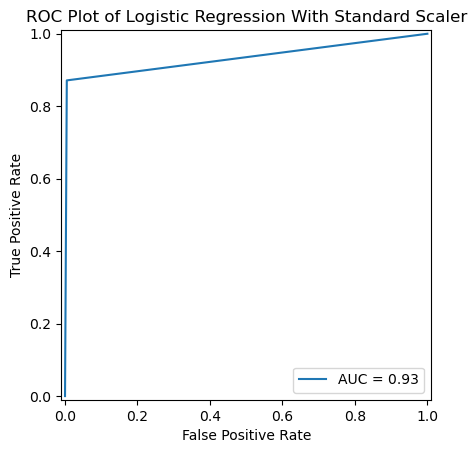

In [307]:
# AUC, ROC for model 2: 

fpr3, tpr3, thresholds = roc_curve(y_test2, y_preds3)
roc_auc3 = auc(fpr3, tpr3)
display = metrics.RocCurveDisplay(fpr=fpr3, tpr = tpr3, roc_auc = roc_auc3)

display.plot()
plt.title('ROC Plot of Logistic Regression With Standard Scaler')

# Model 3 - Min Max Scaler Model

In [308]:

from sklearn.preprocessing import MinMaxScaler


# numerical features
Num2 = LoanData2[['Age', 'Income', 'LoanAmount', 'CreditScore', 'YearsEmployed',
                   'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']]

# cat features
Cat2 = LoanData2.drop(columns=Num2.columns)

# Rebuild dataset
LoanData4 = pd.concat([Num2, Cat2], axis=1)

# splt x,y
X = LoanData4.drop('Default', axis=1)
y = LoanData4['Default']

# Split 
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize
scaler = MinMaxScaler()

# Fit scaler
X_train_scaled = scaler.fit_transform(X_train3)

# apply on test data
X_test_scaled = scaler.transform(X_test3)

# Initialize 
log_reg4 = LogisticRegression(random_state=123)

# Fit model
log_reg4.fit(X_train_scaled, y_train3)

# Predictions
y_preds4 = log_reg4.predict(X_test_scaled)

# Evaluate
model3 = evaluate_preds(y_test3, y_preds4)
model3


Accuracy: 93.44%
Precision: 1.00
Recall: 0.87
F1:0.93


{'accuracy': 0.93, 'precision': 1.0, 'recall': 0.87, 'f1': 0.93}

In [309]:
# Confusion Matrix 
confusion_matrix(y_test3, y_preds4)

array([[44957,   196],
       [ 5724, 39401]], dtype=int64)

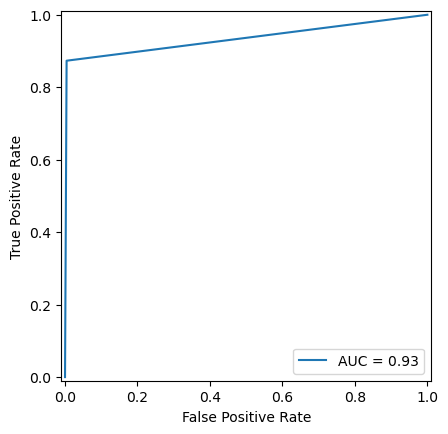

In [310]:
# Implement AUC_score, and ROC curve 


fpr4, tpr4, thresholds = roc_curve(y_test3, y_preds4)
roc_auc4 = auc(fpr4, tpr4)
display = metrics.RocCurveDisplay(fpr=fpr4, tpr = tpr4, roc_auc = roc_auc4)
display.plot()


<Figure size 640x480 with 0 Axes>

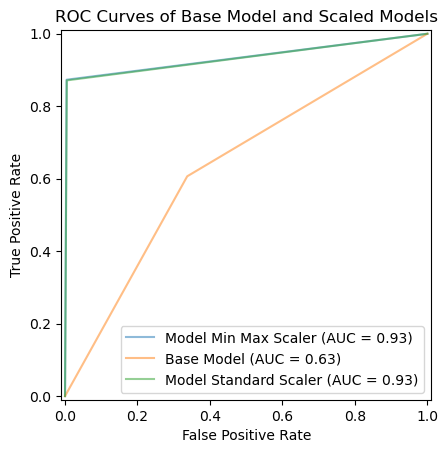

In [311]:
# Compare 

# Create the plot
plt.figure()

# ROC 1
metrics.RocCurveDisplay(fpr=fpr4, tpr=tpr4, roc_auc=roc_auc4, estimator_name='Model Min Max Scaler').plot(alpha=0.5)

# ROC 2
metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='Base Model').plot(ax=plt.gca(), alpha=0.5)

# Roc3
metrics.RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3, estimator_name='Model Standard Scaler').plot(ax=plt.gca(), alpha=0.5)

plt.title('ROC Curves of Base Model and Scaled Models')

# show
plt.show()



In [312]:
# min max scaler performs slightly better on unseen data 

In [313]:
# Odds ratios: 

# log odds 
log_odds = log_reg3.coef_[0]

# odds_ratios
odds_ratios = np.exp(log_odds)

# combine
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Log-Odds': log_odds,
    'Odds Ratio': odds_ratios
})

coefficients

,Feature,Log-Odds,Odds Ratio
0,Age,-0.603763,0.546750
1,Income,-0.196090,0.821938
2,LoanAmount,0.306753,1.359006
3,CreditScore,-0.097651,0.906965
4,MonthsEmployed,-0.058709,0.942981
5,NumCreditLines,0.082595,1.086102
6,InterestRate,0.426279,1.531549
7,LoanTerm,-0.171881,0.842080
8,DTIRatio,0.037190,1.037890
9,HasMortgage,-0.257712,0.772818


Text(0.5, 1.0, 'Correlation Matrix')

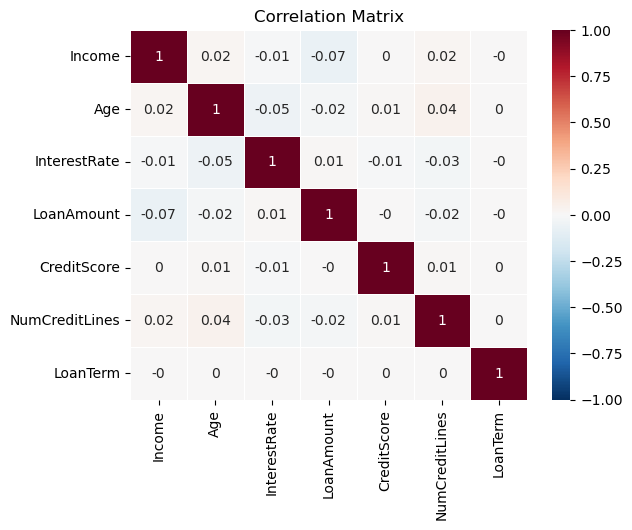

In [314]:
# Correlation analysis 

# coefficients have shown us the relationships between each attribute and the dependent variable,
# but what are the relationships between the independent variables like? 


# --> are any of the relationships between the numerical features linear? --> correlation analysis 

# CORRELATION ANALYSIS 

Num = LoanData2[['Income', 'Age', 'InterestRate', 'LoanAmount', 'CreditScore', 'NumCreditLines', 'LoanTerm']]

# extract numerical features --> we already have them stored in Num
Num.head()

# correlation
correlation = Num.corr().round(2)

# Plot 
import seaborn as sns 
sns.heatmap(correlation, cmap = 'RdBu_r', vmin = -1, vmax = 1, annot = True, linewidths=0.5)
plt.title('Correlation Matrix')



Text(0.5, 1.0, 'Scatterplot of Age-Income Relationship')

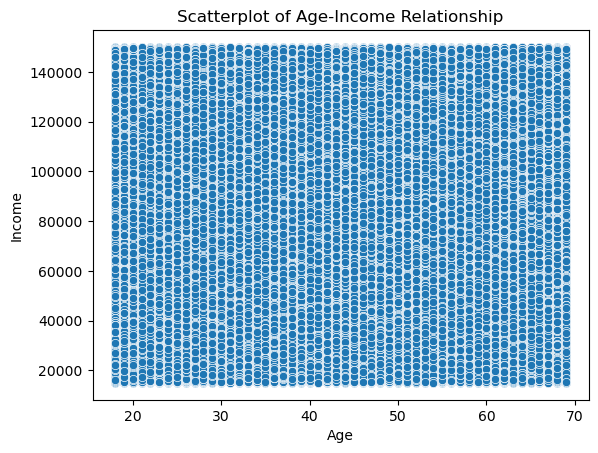

In [315]:
# plot the relationships between these variables to confirm this: 

# Age-income 
sns.scatterplot(LoanData2, x = 'Age', y = 'Income')
plt.title('Scatterplot of Age-Income Relationship')

Text(0.5, 1.0, 'Scatterplot of Age-CreditScore Relationship')

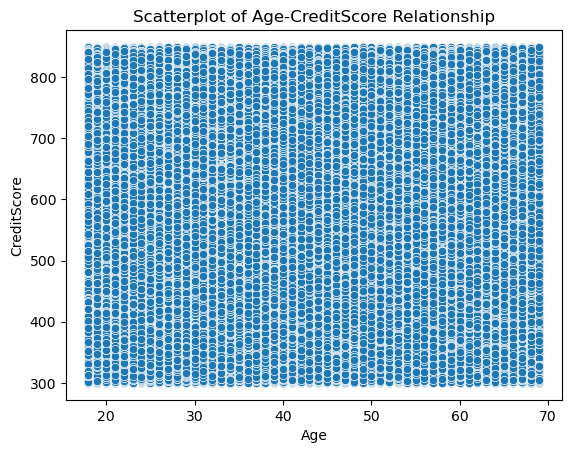

In [316]:
# Age-CreditScore 
sns.scatterplot(LoanData2, x = 'Age', y = 'CreditScore')
plt.title('Scatterplot of Age-CreditScore Relationship')


Text(0.5, 1.0, 'Relationship between Age and Interest Rate')

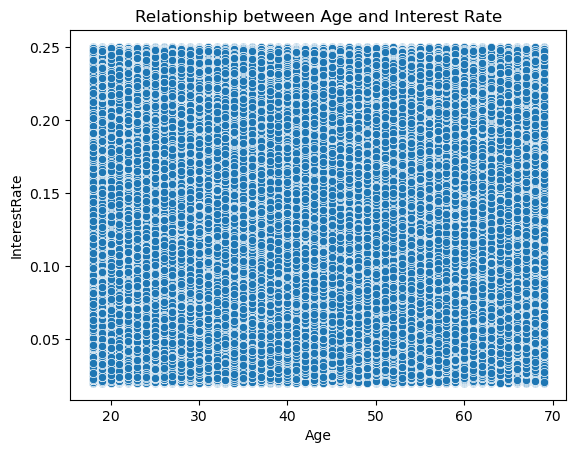

In [317]:
# Age-interest rate 

sns.scatterplot(LoanData2, x = 'Age', y = 'InterestRate')
plt.title('Relationship between Age and Interest Rate')

# Mutual Information

In [318]:
# Mutual Information

# chosen as it is one of the few methods that can be applied to mixed data types 

# what does it do? 

## -> tells us how on average, the change we see in one variable is related to the change in another variable

# import MI for discrete target variable 



# split data 

X = LoanData2.drop('Default', axis = 1)
y = LoanData2['Default']

# Split data 

X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size = 0.2)

# Find Mutual Information 
mutual_info = mutual_info_classif(X_train6, y_train6)

# Restructure the mutual information values 
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train6.columns
mutual_info.sort_values(ascending = False)

YearsEmployed                   0.481903
DTIRatio                        0.477670
InterestRate                    0.462657
LoanTerm_In_Years               0.340880
LoanTerm                        0.301449
HasCoSigner                     0.060725
HasDependents                   0.058315
Age                             0.056934
HasMortgage                     0.053787
MaritalStatus_Married           0.045585
DTI_Classification              0.042545
EmploymentType_Full-time        0.040769
AgeGroup_60+                    0.037805
Education_PhD                   0.035670
Education_Master's              0.032783
CreditScoreRating_Poor          0.032280
LoanPurpose_Home                0.032140
MaritalStatus_Single            0.030583
EmploymentType_Self-employed    0.029527
NumCreditLines                  0.028938
MonthsEmployed                  0.028444
Education_Bachelor's            0.027611
MaritalStatus_Divorced          0.026674
EmploymentType_Part-time        0.026177
IncomeGroup_Uppe

# Model 4 - Mutual Information 

In [319]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X = LoanData2[['YearsEmployed', 'DTIRatio', 'InterestRate', 'LoanTerm']]
y = LoanData2['Default']

# Split 
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Scale
scaler = MinMaxScaler()

# Fit scaler
X_train7_scaled = scaler.fit_transform(X_train7)

# Apply scaler
X_test7_scaled = scaler.transform(X_test7)

# Initialize
log_reg6 = LogisticRegression(random_state=123)

# Fit model
log_reg6.fit(X_train7_scaled, y_train7)

# Predictoins
y_preds6 = log_reg6.predict(X_test7_scaled)

# Evaluate 
model4 = evaluate_preds(y_test7, y_preds6)
model4


Accuracy: 62.07%
Precision: 0.62
Recall: 0.64
F1:0.63


{'accuracy': 0.62, 'precision': 0.62, 'recall': 0.64, 'f1': 0.63}

# Model 5 - Categorical Features 

In [320]:

Categorical= LoanData2[["Education_Bachelor's", "Education_High School", "Education_Master's",
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'Default']]

X = Categorical.drop('Default', axis = 1)
y = Categorical['Default']

X_train8, X_test8, y_train8, y_test8 = train_test_split(X,y,test_size = 0.2)

# Initialise  
log_reg7 = LogisticRegression()

# Fit model
log_reg7.fit(X_train8, y_train8)

# Predictions
y_preds7 = log_reg7.predict(X_test8)

# Evaluate
model5 = evaluate_preds(y_test8, y_preds7)
model5


Accuracy: 93.27%
Precision: 1.00
Recall: 0.87
F1:0.93


{'accuracy': 0.93, 'precision': 1.0, 'recall': 0.87, 'f1': 0.93}

<Figure size 640x480 with 0 Axes>

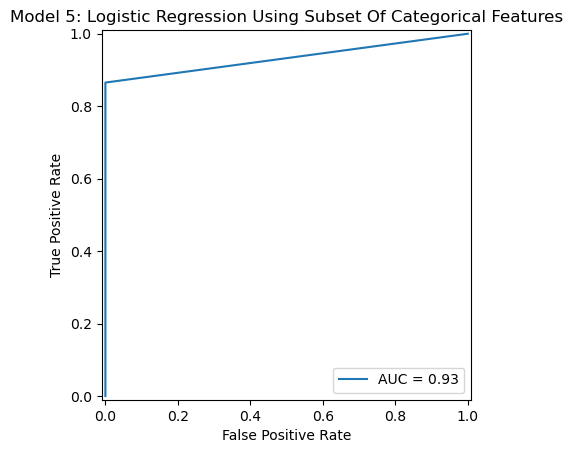

In [321]:
# ROC AUC
fpr5, tpr5, thresholds = roc_curve(y_test8, y_preds7)
roc_auc5 = auc(fpr5, tpr5)

# Create the ROC curve display
display = metrics.RocCurveDisplay(fpr=fpr5, tpr=tpr5, roc_auc=roc_auc5)

# ROC
plt.figure()  
display.plot()  
plt.title('Model 5: Logistic Regression Using Subset Of Categorical Features')
plt.show()


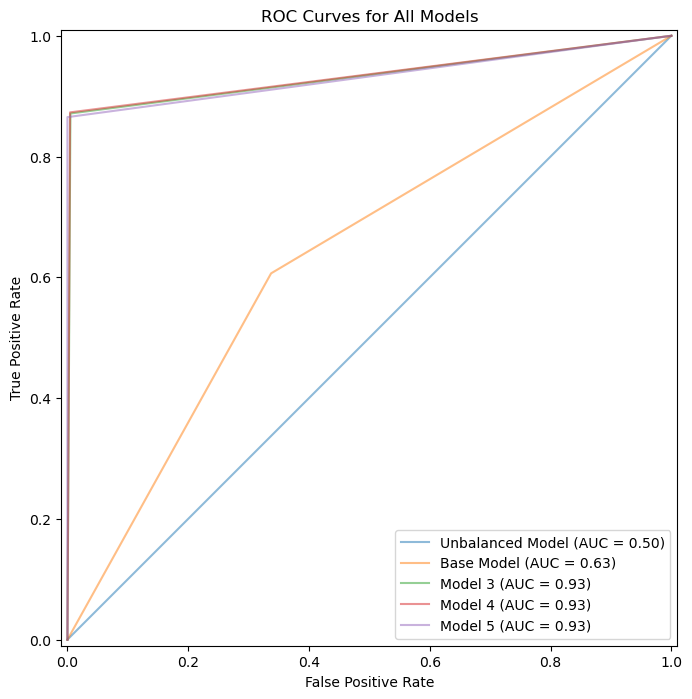

In [322]:


# Adding this ROC Curve to the previous ones 

# Create the plot
plt.figure(figsize=(10, 8))  # Adjust size for better readability

# Plot ROCs
metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='Unbalanced Model').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='Base Model').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3, estimator_name='Model 3').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr4, tpr=tpr4, roc_auc=roc_auc4, estimator_name='Model 4').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr5, tpr=tpr5, roc_auc=roc_auc5, estimator_name='Model 5').plot(alpha=0.5, ax=plt.gca())

# info
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# Recursive Feature Elimination

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd

# extract num features
Num = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'YearsEmployed', 
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Separate 
X = LoanData2.drop('Default', axis=1)
y = LoanData2['Default']

# Split 
X_train9, X_test9, y_train9, y_test9 = train_test_split(X, y, test_size=0.2, random_state=1)

# Separate 
X_train9_num = X_train9[Num]
X_train9_cat = X_train9.drop(Num, axis=1)  # Categorical or non-numeric features

X_test9_num = X_test9[Num]
X_test9_cat = X_test9.drop(Num, axis=1)  # Categorical or non-numeric features

# Scale
scaler = MinMaxScaler()

# Fit scaler
X_train9_num_scaled = scaler.fit_transform(X_train9_num)

# Apply scaler
X_test9_num_scaled = scaler.transform(X_test9_num)

# Put as DF
X_train9_num_scaled = pd.DataFrame(X_train9_num_scaled, columns=Num, index=X_train9.index)
X_test9_num_scaled = pd.DataFrame(X_test9_num_scaled, columns=Num, index=X_test9.index)

# Merge
X_train9_scaled = pd.concat([X_train9_num_scaled, X_train9_cat], axis=1)
X_test9_scaled = pd.concat([X_test9_num_scaled, X_test9_cat], axis=1)

# Initialise 
log_reg8 = LogisticRegression()

# Initialise
rfe = RFE(estimator=log_reg8, n_features_to_select=22)

# Fit RFE
rfe.fit(X_train9_scaled, y_train9)

# Get necessary pieces
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

# Get list of features 
selected_features = X.columns[rfe.support_]
print("Selected Feature Names:", selected_features)


C:\Users\Data\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Data\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Selected Features: [False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
  True  True  True  True False  True False  True False]
Feature Ranking: [ 5 11  8 12  7 15  6  9 18 23 16 14 13 10  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 17 20 19 21 22 24  1  1  1  1  4  1  2  1  3]
Selected Feature Names: Index(['Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other',
       'IncomeGroup_Low', 'IncomeGroup_Lower-Middle', 'IncomeGroup_Middle',
       'IncomeGroup

In [324]:
# convert to df for interpretability 

pd.DataFrame(selected_features)

,0
0,Education_Bachelor's
1,Education_High School
2,Education_Master's
3,Education_PhD
4,EmploymentType_Full-time
5,EmploymentType_Part-time
6,EmploymentType_Self-employed
7,EmploymentType_Unemployed
8,MaritalStatus_Divorced
9,MaritalStatus_Married


# Model 6 - RFE First Half

In [325]:
# RFE Model - First half

# aall of the features that are selected are categorical 


# build a model using these features 

RFE_features = LoanData2[["Education_Bachelor's", "Education_High School", "Education_Master's", 
                 "Education_PhD", "EmploymentType_Full-time", "EmploymentType_Part-time", 
                 "EmploymentType_Self-employed", "EmploymentType_Unemployed", 
                 "MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single", 
                 "LoanPurpose_Auto", "LoanPurpose_Business", "LoanPurpose_Education", 
                 "LoanPurpose_Home", "LoanPurpose_Other", "IncomeGroup_Low", 
                 "IncomeGroup_Lower-Middle", "IncomeGroup_Middle", "IncomeGroup_Upper", 
                 "CreditScoreRating_Fair", "CreditScoreRating_Poor", 'Default']]

# Build the model 

X = RFE_features.drop('Default', axis = 1)
y = RFE_features['Default']

X_train10, X_test10, y_train10, y_test10 = train_test_split(X,y, test_size = 0.2)

# initialise
log_reg9 = LogisticRegression()

# Fit 
log_reg9.fit(X_train10, y_train10)

# Predictions

y_preds8 = log_reg9.predict(X_test10)

# Evaluate
model6 = evaluate_preds(y_test10, y_preds8)
model6


Accuracy: 93.21%
Precision: 1.00
Recall: 0.86
F1:0.93


{'accuracy': 0.93, 'precision': 1.0, 'recall': 0.86, 'f1': 0.93}

In [326]:
# Add to main plot 

# Add ROC curve to the plot with the previous ones 

# Adding this ROC Curve to the previous ones 

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve
import seaborn as sns

# ROC 1
fpr1, tpr1, thresholds1 = roc_curve(y_test2, y_preds3)
roc_auc1 = auc(fpr1, tpr1)

# ROC 2
fpr2, tpr2, thresholds2 = roc_curve(y_test3, y_preds4)
roc_auc2 = auc(fpr2, tpr2)

# ROC Base curve - base model
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_preds2)
roc_auc3 = auc(fpr3, tpr3)

# Roc 4
fpr4, tpr4, thresholds4 = roc_curve(y_test7, y_preds6)
roc_auc4 = auc(fpr4, tpr4)

# ROC 5
fpr5, tpr5, thresholds5 = roc_curve(y_test8, y_preds7)
roc_auc5 = auc(fpr5, tpr5)

# ROC 6
fpr6, tpr6 , thresholds6 = roc_curve(y_test10, y_preds8)
roc_auc6 = auc(fpr6, tpr6)

# Create the plot
plt.figure(figsize=(10, 8))  # Adjust size for better readability

# Plot
metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='Model 2').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='Model 3').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3, estimator_name='Base Model').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr4, tpr=tpr4, roc_auc=roc_auc4, estimator_name='Model 4').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr5, tpr=tpr5, roc_auc=roc_auc5, estimator_name='Model 5').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr6, tpr=tpr6, roc_auc=roc_auc6, estimator_name='Model 6').plot(alpha=0.5, ax=plt.gca())



# label
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [51070, 90278]

# Model 7 - Second Half

In [327]:
Sample = LoanData2.drop(["Education_Bachelor's", "Education_High School", "Education_Master's", 
                 "Education_PhD", "EmploymentType_Full-time", "EmploymentType_Part-time", 
                 "EmploymentType_Self-employed", "EmploymentType_Unemployed", 
                 "MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single", 
                 "LoanPurpose_Auto", "LoanPurpose_Business", "LoanPurpose_Education", 
                 "LoanPurpose_Home", "LoanPurpose_Other", "IncomeGroup_Low", 
                 "IncomeGroup_Lower-Middle", "IncomeGroup_Middle", "IncomeGroup_Upper", 
                 "CreditScoreRating_Fair", "CreditScoreRating_Poor"], axis = 1)

In [328]:

Num = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'YearsEmployed', 
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Splt X, y
X = Sample.drop('Default', axis=1)
y = Sample['Default']  # Use the correct target column from `Sample`, not `Sample_scaled`

# Split 
X_train11, X_test11, y_train11, y_test11 = train_test_split(X, y, test_size=0.2, random_state=1)

# Separate
X_train_num = X_train11[Num]
X_train_cat = X_train11.drop(Num, axis=1)  # Categorical or non-numeric features

X_test_num = X_test11[Num]
X_test_cat = X_test11.drop(Num, axis=1)  # Categorical or non-numeric features

# Scaler
scaler = MinMaxScaler()

# transform
X_train_num_scaled = scaler.fit_transform(X_train_num)

# Apply scaler on test data
X_test_num_scaled = scaler.transform(X_test_num)

# Set as df
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=Num, index=X_train11.index)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=Num, index=X_test11.index)

# Merge
X_train11_scaled = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test11_scaled = pd.concat([X_test_num_scaled, X_test_cat], axis=1)

# Initialize 
log_reg10 = LogisticRegression()

# Fit model
log_reg10.fit(X_train11_scaled, y_train11)

# Predictions
y_preds9 = log_reg10.predict(X_test11_scaled)

# Evaluate 
model7 = evaluate_preds(y_test11, y_preds9)
model7


Accuracy: 77.16%
Precision: 0.76
Recall: 0.79
F1:0.77


C:\Users\Data\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy': 0.77, 'precision': 0.76, 'recall': 0.79, 'f1': 0.77}

In [329]:
# Confusion Matrix 

confusion_matrix(y_test11, y_preds9)

array([[34146, 11063],
       [ 9557, 35512]], dtype=int64)

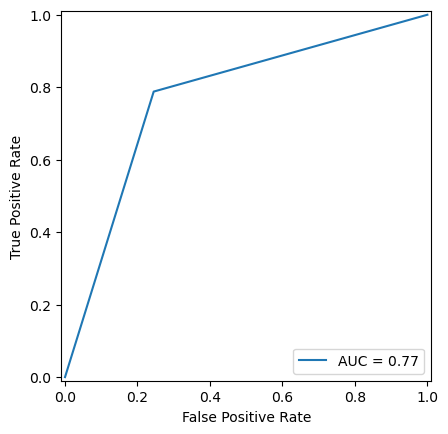

In [330]:
# AUC, ROC for model 3: 

# AUC, ROC for model 2: 

# Implement AUC_score, and ROC curve 


fpr7, tpr7, thresholds = roc_curve(y_test11, y_preds9)
roc_auc7 = auc(fpr7, tpr7)
display = metrics.RocCurveDisplay(fpr=fpr7, tpr = tpr7, roc_auc = roc_auc7)

display.plot()

In [331]:
# interpret: decrease in model performance compared to the other share of features 
# but the model still performs well overall 

In [332]:
# suggests that these features are less significant 

Text(0.5, 1.0, 'Model 6 vs Model 7')

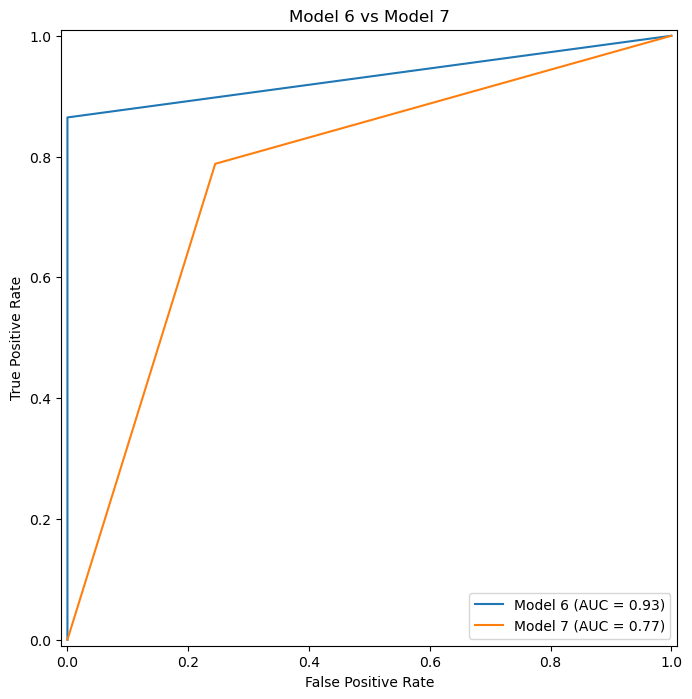

In [333]:
# Compare to the previous model 

# Sixth ROC curve 
fpr6, tpr6 , thresholds6 = roc_curve(y_test10, y_preds8)
roc_auc6 = auc(fpr6, tpr6)

fpr7, tpr7, thresholds = roc_curve(y_test11, y_preds9)
roc_auc7 = auc(fpr7, tpr7)

# Create the plot
plt.figure(figsize=(10, 8))  # Adjust size for better readability

metrics.RocCurveDisplay(fpr=fpr6, tpr=tpr6, roc_auc=roc_auc6, estimator_name='Model 6').plot(ax = plt.gca())
metrics.RocCurveDisplay(fpr=fpr7, tpr=tpr7, roc_auc=roc_auc7, estimator_name='Model 7').plot(ax = plt.gca())

plt.title('Model 6 vs Model 7')


In [334]:
# Add Model 6 to plot with all of the other models 

# Add to main plot 

# Add ROC curve to the plot with the previous ones 

# Adding this ROC Curve to the previous ones 



# ROC 1
fpr1, tpr1, thresholds1 = roc_curve(y_test2, y_preds3)
roc_auc1 = auc(fpr1, tpr1)

# ROC 2
fpr2, tpr2, thresholds2 = roc_curve(y_test3, y_preds4)
roc_auc2 = auc(fpr2, tpr2)

# ROC base
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_preds2)
roc_auc3 = auc(fpr3, tpr3)

# ROC 4
fpr4, tpr4, thresholds4 = roc_curve(y_test7, y_preds6)
roc_auc4 = auc(fpr4, tpr4)

# ROC 5 
fpr5, tpr5, thresholds5 = roc_curve(y_test8, y_preds7)
roc_auc5 = auc(fpr5, tpr5)

# ROC 6 
fpr6, tpr6 , thresholds6 = roc_curve(y_test10, y_preds8)
roc_auc6 = auc(fpr6, tpr6)

# ROC 7
fpr7, tpr7, thresholds = roc_curve(y_test11, y_preds9)
roc_auc7 = auc(fpr7, tpr7)


# plot
plt.figure(figsize=(10, 8))  # Adjust size for better readability

# Plot
metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='Model 2').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='Model 3').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3, estimator_name='Base Model').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr4, tpr=tpr4, roc_auc=roc_auc4, estimator_name='Model 4').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr5, tpr=tpr5, roc_auc=roc_auc5, estimator_name='Model 5').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr6, tpr=tpr6, roc_auc=roc_auc6, estimator_name='Model 6').plot(ax = plt.gca())
metrics.RocCurveDisplay(fpr=fpr7, tpr=tpr7, roc_auc=roc_auc7, estimator_name='Model 7').plot(ax = plt.gca())



# description
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')


plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [51070, 90278]

# New Models

In [335]:
X = LoanData2.drop('Default', axis = 1)
y = LoanData2['Default']

#split 
X_train12, X_test12, y_train12, y_test12 = train_test_split(X,y, test_size = 0.2, stratify = y)

In [336]:
from sklearn.tree import DecisionTreeClassifier


# initialise
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)

# fit model
clf = clf.fit(X_train12, y_train12)

# predictions
tree_pred1 = clf.predict(X_test12)

# evaluate
basetree = evaluate_preds(y_test12, tree_pred1)
basetree

Accuracy: 87.38%
Precision: 0.87
Recall: 0.88
F1:0.87


{'accuracy': 0.87, 'precision': 0.87, 'recall': 0.88, 'f1': 0.87}

In [337]:
# Confusion Matrix 

confusion_matrix(y_test2, tree_pred1)

array([[22241, 22898],
       [22055, 23084]], dtype=int64)

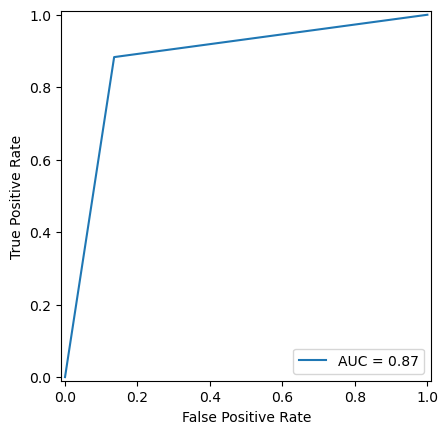

In [338]:
# AUC ROC


fpr8, tpr8, thresholds = roc_curve(y_test12, tree_pred1)
roc_auc8 = auc(fpr8, tpr8)
display = metrics.RocCurveDisplay(fpr=fpr8, tpr = tpr8, roc_auc = roc_auc8)

display.plot()

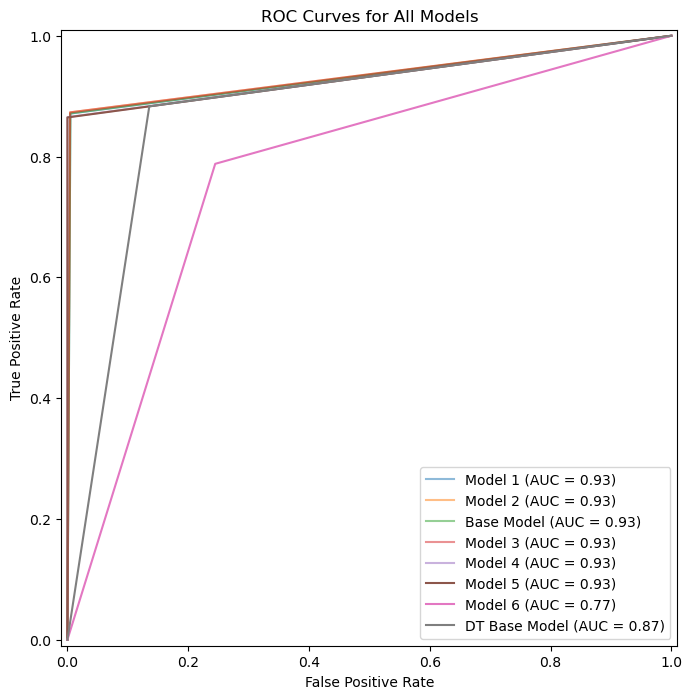

In [340]:
# Add Model 6 to plot with all of the other models 

# Add to main plot 

# Add ROC curve to the plot with the previous ones 

# Adding this ROC Curve to the previous ones 



# Decision tree 1 - base tree 
fpr8, tpr8, thresholds = roc_curve(y_test12, tree_pred1)
roc_auc8 = auc(fpr8, tpr8)



# Create the plot
plt.figure(figsize=(10, 8))  # Adjust size for better readability

# Plot all ROC curves
metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='Model 1').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='Model 2').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3, estimator_name='Base Model').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr4, tpr=tpr4, roc_auc=roc_auc4, estimator_name='Model 3').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr5, tpr=tpr5, roc_auc=roc_auc5, estimator_name='Model 4').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr6, tpr=tpr6, roc_auc=roc_auc6, estimator_name='Model 5').plot(ax = plt.gca())
metrics.RocCurveDisplay(fpr=fpr7, tpr=tpr7, roc_auc=roc_auc7, estimator_name='Model 6').plot(ax = plt.gca())
metrics.RocCurveDisplay(fpr=fpr8, tpr = tpr8, roc_auc = roc_auc8, estimator_name = 'DT Base Model').plot(ax=plt.gca())




# Add titles and labels
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [341]:
# interpret: this tree performs very well, but it is less good than the log model after standard scaler 

In [342]:
# why? trees are very flexible --> may have traced the data rather thus affecting prediction 

# solution: try less features --> use the best subset of features selected so far and evaluate 

# Decision Tree 2: Using best selected features so far 

In [343]:
# almost all of the features that are selected are categorical 


# build a model using these features 

RFE_features = LoanData2[["Education_Bachelor's", "Education_High School", "Education_Master's", 
                 "Education_PhD", "EmploymentType_Full-time", "EmploymentType_Part-time", 
                 "EmploymentType_Self-employed", "EmploymentType_Unemployed", 
                 "MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single", 
                 "LoanPurpose_Auto", "LoanPurpose_Business", "LoanPurpose_Education", 
                 "LoanPurpose_Home", "LoanPurpose_Other", "IncomeGroup_Low", 
                 "IncomeGroup_Lower-Middle", "IncomeGroup_Middle", "IncomeGroup_Upper", 
                 "CreditScoreRating_Fair", "CreditScoreRating_Poor", 'Default']]

# split X, y
X = RFE_features.drop('Default', axis = 1)
y = RFE_features['Default']

# train test split 

X_train12, X_test12, y_train12, y_test12 = train_test_split(X,y, test_size = 0.2, stratify = y)

# Initialise

clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)

# train decision tree 
clf2 = clf2.fit(X_train12, y_train12)

# make predictions 
tree_pred2 = clf2.predict(X_test12)

# evaluate performance 
tree2 = evaluate_preds(y_test12, tree_pred2)
tree2

Accuracy: 93.28%
Precision: 1.00
Recall: 0.87
F1:0.93


{'accuracy': 0.93, 'precision': 1.0, 'recall': 0.87, 'f1': 0.93}

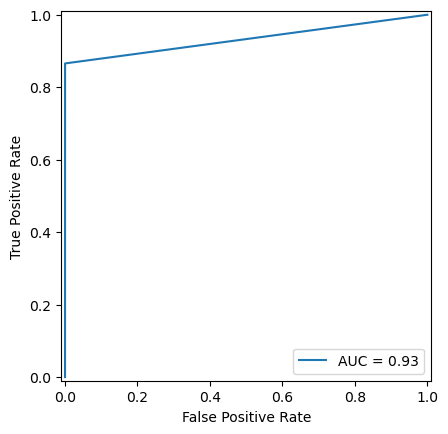

In [344]:
# AUC ROC

fpr9, tpr9, thresholds = roc_curve(y_test12, tree_pred2)
roc_auc9 = auc(fpr9, tpr9)
display = metrics.RocCurveDisplay(fpr=fpr9, tpr = tpr9, roc_auc = roc_auc9)

display.plot()

In [345]:
# interpret: significant increase in performance 



# Decision Tree 3: Other Subset of Features 

In [346]:
# do we see a similar decrease as before when using the other half of the attributes? 

# scale the numeric features 

Sample = LoanData2.drop(["Education_Bachelor's", "Education_High School", "Education_Master's", 
                 "Education_PhD", "EmploymentType_Full-time", "EmploymentType_Part-time", 
                 "EmploymentType_Self-employed", "EmploymentType_Unemployed", 
                 "MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single", 
                 "LoanPurpose_Auto", "LoanPurpose_Business", "LoanPurpose_Education", 
                 "LoanPurpose_Home", "LoanPurpose_Other", "IncomeGroup_Low", 
                 "IncomeGroup_Lower-Middle", "IncomeGroup_Middle", "IncomeGroup_Upper", 
                 "CreditScoreRating_Fair", "CreditScoreRating_Poor"], axis = 1)


# Split the data 

X = Sample.drop('Default', axis = 1)
y = Sample['Default']

# train-test split 
X_train13, X_test13, y_train13, y_test13 = train_test_split(X,y, test_size=0.2)

clf3 = DecisionTreeClassifier(criterion = 'entropy',random_state = 1)

# train decision tree 
clf3 = clf.fit(X_train13, y_train13)

# make predictions 
tree_pred3 = clf3.predict(X_test13)

# evaluate performance 
tree3 = evaluate_preds(y_test13, tree_pred3)
tree3

Accuracy: 83.93%
Precision: 0.83
Recall: 0.85
F1:0.84


{'accuracy': 0.84, 'precision': 0.83, 'recall': 0.85, 'f1': 0.84}

In [347]:
confusion_matrix(y_test13, tree_pred3)

array([[37238,  7912],
       [ 6597, 38531]], dtype=int64)

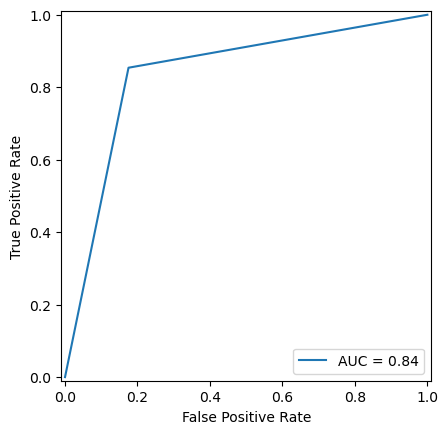

In [348]:
# ROC-AUC
# AUC ROC

fpr10, tpr10, thresholds = roc_curve(y_test13, tree_pred3)
roc_auc10 = auc(fpr10, tpr10)
display = metrics.RocCurveDisplay(fpr=fpr10, tpr = tpr10, roc_auc = roc_auc10)

display.plot()

Text(0.5, 1.0, 'ROC Curves of Decision Trees 2 and 3')

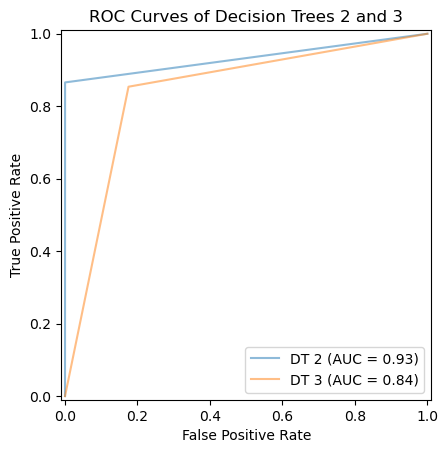

In [349]:
# combine the two ROC curves into one plot 

metrics.RocCurveDisplay(fpr=fpr9, tpr = tpr9, roc_auc = roc_auc9, estimator_name = 'DT 2').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr10, tpr = tpr10, roc_auc = roc_auc10, estimator_name = 'DT 3').plot(alpha=0.5, ax=plt.gca())

plt.title('ROC Curves of Decision Trees 2 and 3')


# Decision Tree 4 

In [350]:
# what if we added more of the standard features to the first set of features? 

# all of the features in RFE list are cat --> add numerical ones for comparison  


# build a model using these features 

RFE_features = LoanData2[['Age', 'LoanAmount', 'YearsEmployed', 'InterestRate', 'LoanTerm', 'Income', 'DTIRatio', 
                          'CreditScore', "Education_Bachelor's", "Education_High School", "Education_Master's", 
                 "Education_PhD", "EmploymentType_Full-time", "EmploymentType_Part-time", 
                 "EmploymentType_Self-employed", "EmploymentType_Unemployed", 
                 "MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single", 
                 "LoanPurpose_Auto", "LoanPurpose_Business", "LoanPurpose_Education", 
                 "LoanPurpose_Home", "LoanPurpose_Other", "IncomeGroup_Low", 
                 "IncomeGroup_Lower-Middle", "IncomeGroup_Middle", "IncomeGroup_Upper", 
                 "CreditScoreRating_Fair", "CreditScoreRating_Poor", 'Default']]


# split X, y
X = RFE_features.drop('Default', axis = 1)
y = RFE_features['Default']

# train test split 

X_train14, X_test14, y_train14, y_test14 = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 123)


clf4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)

# fit
clf4 = clf4.fit(X_train14, y_train14)

# predictions 
tree_pred4 = clf4.predict(X_test14)

# evaluate 
tree4 = evaluate_preds(y_test14, tree_pred4)
tree4

Accuracy: 87.71%
Precision: 0.87
Recall: 0.88
F1:0.88


{'accuracy': 0.88, 'precision': 0.87, 'recall': 0.88, 'f1': 0.88}

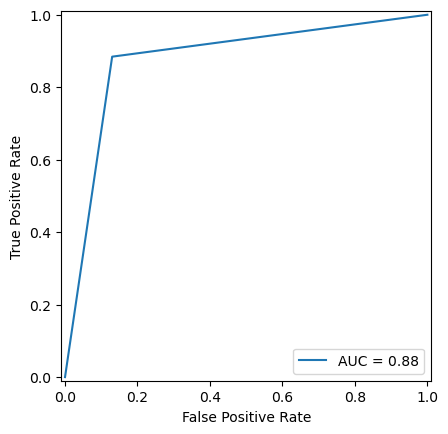

In [351]:
# AUC ROC

fpr11, tpr11, thresholds = roc_curve(y_test14, tree_pred4)
roc_auc11 = auc(fpr11, tpr11)
display = metrics.RocCurveDisplay(fpr=fpr11, tpr = tpr11, roc_auc = roc_auc11)

display.plot()

Text(0.5, 1.0, 'ROC Curves of Decision Trees 2,3 and 4')

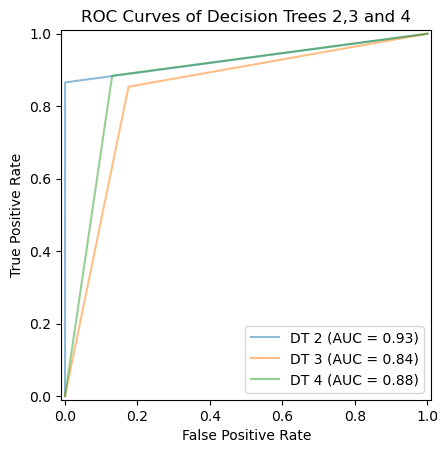

In [352]:
# Combine all of the tree models into one plot 

# combine the two ROC curves into one plot 

metrics.RocCurveDisplay(fpr=fpr9, tpr = tpr9, roc_auc = roc_auc9, estimator_name = 'DT 2').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr10, tpr = tpr10, roc_auc = roc_auc10, estimator_name = 'DT 3').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr11, tpr = tpr11, roc_auc = roc_auc11, estimator_name = 'DT 4').plot(alpha=0.5, ax=plt.gca())

plt.title('ROC Curves of Decision Trees 2,3 and 4')





# Random Forests 

In [353]:
# set up RF
from sklearn.ensemble import RandomForestClassifier


# no feature selection 
X = LoanData2.drop('Default', axis = 1)
y = LoanData2['Default']


# train-test split 
X_train15, X_test15, y_train15, y_test15 = train_test_split(X,y, test_size = 0.2)

# initialise
rf1 = RandomForestClassifier(random_state = 123)

# fit 
rf1.fit(X_train15, y_train15)

# predictions
rfbase = rf1.predict(X_test15)


# evaluate 
baseforest = evaluate_preds(y_test15, rfbase)
baseforest

Accuracy: 93.30%
Precision: 0.99
Recall: 0.87
F1:0.93


{'accuracy': 0.93, 'precision': 0.99, 'recall': 0.87, 'f1': 0.93}

Text(0.5, 1.0, 'Random Forest Base Model')

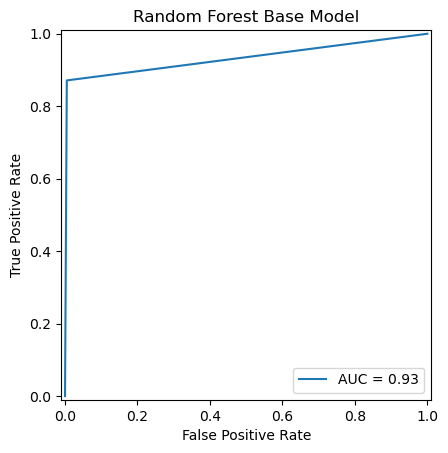

In [354]:
# ROC

fpr12, tpr12, thresholds = roc_curve(y_test15, rfbase)
roc_auc12 = auc(fpr12, tpr12)
display = metrics.RocCurveDisplay(fpr=fpr12, tpr = tpr12, roc_auc = roc_auc12)
display.plot()
plt.title('Random Forest Base Model')


# Random Forest 2

In [356]:
# Random Forest 2 

# Building Random Forest only using first share of features 

# build a model using these features 

RFE_features = LoanData2[["Education_Bachelor's", "Education_High School", "Education_Master's", 
                 "Education_PhD", "EmploymentType_Full-time", "EmploymentType_Part-time", 
                 "EmploymentType_Self-employed", "EmploymentType_Unemployed", 
                 "MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single", 
                 "LoanPurpose_Auto", "LoanPurpose_Business", "LoanPurpose_Education", 
                 "LoanPurpose_Home", "LoanPurpose_Other", "IncomeGroup_Low", 
                 "IncomeGroup_Lower-Middle", "IncomeGroup_Middle", "IncomeGroup_Upper", 
                 "CreditScoreRating_Fair", "CreditScoreRating_Poor", 'Default']]


# split X, y
X = RFE_features.drop('Default', axis = 1)
y = RFE_features['Default']

# train test split 

X_train16, X_test16, y_train16, y_test16 = train_test_split(X,y, test_size = 0.2)


# initialise
rf2 = RandomForestClassifier(random_state = 123)

# train forest 
rf2 = rf2.fit(X_train16, y_train16)

# predictions 
rf2model = rf2.predict(X_test16)

# evaluate
forest2 = evaluate_preds(y_test16, rf2model)
forest2

Accuracy: 93.32%
Precision: 1.00
Recall: 0.87
F1:0.93


{'accuracy': 0.93, 'precision': 1.0, 'recall': 0.87, 'f1': 0.93}

Text(0.5, 1.0, 'Random Forest Base and 2')

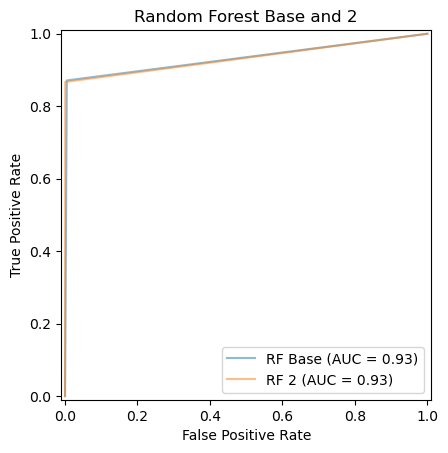

In [357]:
# Performance is about the same 

# ROC - AUc


fpr13, tpr13, thresholds = roc_curve(y_test16, rf2model)
roc_auc13 = auc(fpr13, tpr13)

metrics.RocCurveDisplay(fpr=fpr12, tpr = tpr12, roc_auc = roc_auc12, estimator_name = 'RF Base').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr13, tpr=tpr13, roc_auc = roc_auc13, estimator_name = 'RF 2').plot(alpha=0.5, ax=plt.gca())
plt.title('Random Forest Base and 2')


In [253]:
# Interpret: reducing the number of features maintains performance like with logistic regression 

# Random Forest 3 

In [ ]:
# Random Forest with second set of features 

# do we see a similar decrease as before when using the other half of the attributes? 

Sample = LoanData2.drop(["Education_Bachelor's", "Education_High School", "Education_Master's", 
                 "Education_PhD", "EmploymentType_Full-time", "EmploymentType_Part-time", 
                 "EmploymentType_Self-employed", "EmploymentType_Unemployed", 
                 "MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single", 
                 "LoanPurpose_Auto", "LoanPurpose_Business", "LoanPurpose_Education", 
                 "LoanPurpose_Home", "LoanPurpose_Other", "IncomeGroup_Low", 
                 "IncomeGroup_Lower-Middle", "IncomeGroup_Middle", "IncomeGroup_Upper", 
                 "CreditScoreRating_Fair", "CreditScoreRating_Poor"], axis = 1)


# Split the data 

X = Sample.drop('Default', axis = 1)
y = Sample['Default']

# train-test split 
X_train17, X_test17, y_train17, y_test17 = train_test_split(X,y, test_size=0.2)

# initialise

rf3 = RandomForestClassifier(random_state = 123)

# train decision tree 
rf3 = rf3.fit(X_train17, y_train17)

# predict
rf3model = rf3.predict(X_test17)

# evaluate
forest3 = evaluate_preds(y_test17, rf3model)
forest3

In [ ]:
# decrease in performance like with th previous models 



Text(0.5, 1.0, 'Random Forests')

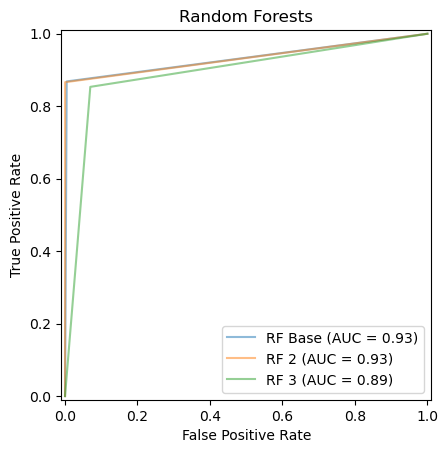

In [419]:
# Add this RF to the plot with the other two for comparison 

# Add to ROC-AUC 

fpr14, tpr14, thresholds = roc_curve(y_test17, rf3model)
roc_auc14 = auc(fpr14, tpr14)

metrics.RocCurveDisplay(fpr=fpr12, tpr = tpr12, roc_auc = roc_auc12, estimator_name = 'RF Base').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr13, tpr=tpr13, roc_auc = roc_auc13, estimator_name = 'RF 2').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr14, tpr=tpr14, roc_auc = roc_auc14, estimator_name = 'RF 3').plot(alpha = 0.5, ax=plt.gca())
plt.title('Random Forests')




# Neural Networks 

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Base Model
# Split data 
X = LoanData2.drop('Default', axis=1)
y = LoanData2['Default']

# Split
X_train18, X_test18, y_train18, y_test18 = train_test_split(X, y, test_size=0.2, random_state=42)

# hidden units
hidden_units = 40

# Initialize 
NnBase = Sequential()
NnBase.add(Input(shape=(X_train18.shape[1],)) )  
NnBase.add(Dense(hidden_units, activation='relu'))  
NnBase.add(Dense(1, activation='sigmoid'))  

# compile 
NnBase.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NnBase.summary()

# train 
hist = NnBase.fit(X_train18, y_train18, validation_data=(X_test18, y_test18),
                  epochs=20, batch_size=100, verbose=1)

# predictions
npredsBase = NnBase.predict(X_test18) > 0.5


evaluate_preds(y_test18, npredsBase)


# Neural Network 2 - MinMaxScaler

In [ ]:
# Split 
X = LoanData2.drop('Default', axis=1)
y = LoanData2['Default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# num features
num_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'YearsEmployed',
                'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# scale
scaler = MinMaxScaler()

# apply scaler
X_train_scaled = X_train.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])

# apply scaler pt 2 
X_test_scaled = X_test.copy()
X_test_scaled[num_features] = scaler.transform(X_test[num_features])



# initialise
model = Sequential()
model.add(Dense(40, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# compile
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# get summary of the model 
model.summary()

# train
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=20, batch_size=100)

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  

evaluate_preds(y_test, y_pred)

# Neural Network 3 - RFE 

In [ ]:
#what if we drop the second set of features  

# build a model using these features 

RFE_features = LoanData2[["Education_Bachelor's", "Education_High School", "Education_Master's", 
                 "Education_PhD", "EmploymentType_Full-time", "EmploymentType_Part-time", 
                 "EmploymentType_Self-employed", "EmploymentType_Unemployed", 
                 "MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single", 
                 "LoanPurpose_Auto", "LoanPurpose_Business", "LoanPurpose_Education", 
                 "LoanPurpose_Home", "LoanPurpose_Other", "IncomeGroup_Low", 
                 "IncomeGroup_Lower-Middle", "IncomeGroup_Middle", "IncomeGroup_Upper", 
                 "CreditScoreRating_Fair", "CreditScoreRating_Poor", 'Default']]





# split X, y
X = RFE_features.drop('Default', axis = 1)
y = RFE_features['Default']

X_train17, X_test17, y_train17, y_test17 = train_test_split(X,y, test_size = 0.2)

# hidden units 
hidden_units = 40

Nn2 = Sequential()
Nn2.add(Dense(hidden_units, activation = 'relu', input_dim = 22))
Nn2.add(Dense(1, activation='sigmoid'))  # For binary classification
Nn2.compile(loss = 'binary_crossentropy', optimizer = 'adam')
Nn2.summary()



# train the model 

hist = Nn2.fit(X_train17, y_train17, validation_data = (X_test17, y_test17),
                 epochs  = 20, batch_size = 100)

npreds2 = Nn2.predict(X_test17) > 0.5

# evaluate 

evaluate_preds(y_test17, npreds2) # more or less the same as log reg

In [ ]:
# Plotting the two neural networks 

# Add this RF to the plot with the other two for comparison 

# interpret: slight increase in performance 

# ROC

fpr, tpr, thresholds = roc_curve(y_test16, npredsBase)
roc_auc = auc(fpr, tpr)

fpr2, tpr2, thresholds = roc_curve(y_test17, npreds2)
roc_auc2 = auc(fpr2, tpr2)



metrics.RocCurveDisplay(fpr=fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'NN Base').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc = roc_auc2, estimator_name = 'NN 2').plot(alpha=0.5, ax=plt.gca())
plt.title('Neural Networks')




In [ ]:
# ROC Plot of all of the models 

# Add Model 6 to plot with all of the other models 

# Add to main plot 

# Add ROC curve to the plot with the previous ones 

# Adding this ROC Curve to the previous ones 

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve
import seaborn as sns

# First ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y_test2, y_preds3)
roc_auc1 = auc(fpr1, tpr1)

# Second ROC curve
fpr2, tpr2, thresholds2 = roc_curve(y_test3, y_preds4)
roc_auc2 = auc(fpr2, tpr2)

# Third ROC curve - base model
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_preds2)
roc_auc3 = auc(fpr3, tpr3)

# Fourth ROC curve
fpr4, tpr4, thresholds4 = roc_curve(y_test7, y_preds6)
roc_auc4 = auc(fpr4, tpr4)

# Fifth ROC curve 
fpr5, tpr5, thresholds5 = roc_curve(y_test8, y_preds7)
roc_auc5 = auc(fpr5, tpr5)

# Sixth ROC curve 
fpr6, tpr6 , thresholds6 = roc_curve(y_test9, y_preds8)
roc_auc6 = auc(fpr6, tpr6)

# Seventh ROC Curve 
fpr7, tpr7, thresholds = roc_curve(y_test10, y_preds9)
roc_auc7 = auc(fpr7, tpr7)

# Decision tree 1 - base tree 
fpr8, tpr8, thresholds = roc_curve(y_test2, tree_pred1)
roc_auc8 = auc(fpr8, tpr8)

# DT 2
fpr9, tpr9, thresholds = roc_curve(y_test10, tree_pred2)
roc_auc9 = auc(fpr9, tpr9)

#DT 3
fpr10, tpr10, thresholds = roc_curve(y_test11, tree_pred3)
roc_auc10 = auc(fpr10, tpr10)


# DT 4
fpr11, tpr11, thresholds = roc_curve(y_test12, tree_pred4)
roc_auc11 = auc(fpr11, tpr11)


#RF Base
fpr12, tpr12, thresholds = roc_curve(y_test13, rfbase)
roc_auc12 = auc(fpr12, tpr12)

# RF 2
fpr13, tpr13, thresholds = roc_curve(y_test14, rf2model)
roc_auc13 = auc(fpr13, tpr13)

#RF 3
fpr14, tpr14, thresholds = roc_curve(y_test15, rf3model)
roc_auc14 = auc(fpr14, tpr14)




# Create the plot
plt.figure(figsize=(10, 8))  # Adjust size for better readability

# Plot all ROC curves
metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='Model 1').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='Model 2').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3, estimator_name='Base Model').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr4, tpr=tpr4, roc_auc=roc_auc4, estimator_name='Model 3').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr5, tpr=tpr5, roc_auc=roc_auc5, estimator_name='Model 4').plot(alpha=0.5, ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr6, tpr=tpr6, roc_auc=roc_auc6, estimator_name='Model 5').plot(ax = plt.gca())
metrics.RocCurveDisplay(fpr=fpr7, tpr=tpr7, roc_auc=roc_auc7, estimator_name='Model 6').plot(ax = plt.gca())
metrics.RocCurveDisplay(fpr=fpr8, tpr = tpr8, roc_auc = roc_auc8, estimator_name = 'DT Base Model').plot(ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr9, tpr = tpr9, roc_auc = roc_auc9, estimator_name = 'DT 2').plot(ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr10, tpr = tpr10, roc_auc = roc_auc10, estimator_name = 'DT 3').plot(ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr11, tpr = tpr11, roc_auc = roc_auc11, estimator_name = 'DT 4').plot(ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr12, tpr = tpr12, roc_auc = roc_auc12, estimator_name = 'RF Base').plot(ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr13, tpr = tpr13, roc_auc = roc_auc13, estimator_name = 'RF 2').plot(ax=plt.gca())
metrics.RocCurveDisplay(fpr=fpr14, tpr = tpr14, roc_auc = roc_auc14, estimator_name = 'RF 3').plot(ax=plt.gca())




# Add titles and labels
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()
